In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

https://www.kaggle.com/code/rafjaa/dealing-with-very-small-datasets#t1

https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import run_ML_classification as ml

# load the data

In [4]:
os.listdir()

['reference_yara_axenic.xlsx',
 '10CC_ML_classifier.joblib',
 '10CC model estimate.ipynb',
 '__pycache__',
 'model_store_compare_RMSE_model.ipynb',
 '10CC_reference_to_model_test_train.ipynb',
 '.ipynb_checkpoints',
 'monte_ponly_predicted_classes.csv.gz',
 'reference_10cc_axenic.xlsx',
 'features_monte_ponly_clean.csv.gz',
 'reference_10cc_all.xlsx',
 '10CC_reference_to_model.ipynb',
 'monte_het_predicted_classes.csv.gz',
 'reference_final.xlsx',
 'monte_predicted_classes.csv.gz',
 'features_monte_het_clean.csv.gz',
 'reference_pro99_axenic.xlsx',
 '.run_ML_classification.py.swp',
 '10cc_FL_to_cell_numbers.ipynb',
 '10CC_reference_to_model_per_strain_shuffle.ipynb',
 'reference_ccpa.xlsx',
 'reference_10cc.xlsx',
 '10CC model build refactor.ipynb',
 'data',
 '10CC_ML_classifier_nolog.joblib',
 'features_training.csv.gz',
 'run_ML_classification.py',
 'features.xlsx',
 '10CC_reference_to_model_per_strain_full.ipynb',
 'model_store_analyze_features.ipynb']

In [5]:
refdf_10cc = pd.read_excel('reference_10cc_all.xlsx')
refdf_ccpa = pd.read_excel('reference_ccpa.xlsx')
refdf_yara = pd.read_excel('reference_yara_axenic.xlsx')


In [6]:
refdf_yara = refdf_yara.loc[~refdf_yara.strain.isin(['ctrl'])].copy()

In [7]:
refdf_yara.Group.value_counts()

Axenic_Other    14427
Axenic            681
Name: Group, dtype: int64

In [8]:
refdf_10cc['Experiment'] = '10CC'
refdf_ccpa['Experiment'] = '5x5'
refdf_yara['Experiment'] = 'Axenic_media'


In [9]:
refdf_ccpa[['Group', 'id','full name',  ]].value_counts()
#[~refdf_ccpa['train_Group'].isin(['Other'])]

Group         id              full name             
Strong_Other  MIT0604_DE1     A. mediterranea AltDE1    1338
Strong        MED4_DE1        A. mediterranea AltDE1    1338
Strong_Other  Natl2A_BS11     A. macleodii BS11         1338
              Natl2A_ATCC     A. macleodii ATCC27126    1338
              Natl2A_1A3      A. macleodii HOT1A3       1338
              MIT9313_DE1     A. mediterranea AltDE1    1338
              MIT9312_DE      A. mediterranea AltDE     1338
              MIT9312_1A3     A. macleodii HOT1A3       1338
              MIT0604_DE      A. mediterranea AltDE     1338
              MIT0604_1A3     A. macleodii HOT1A3       1338
              Natl2A_DE1      A. mediterranea AltDE1    1338
Strong        MED4_DE         A. mediterranea AltDE     1338
Other         all_all         Axenic                    1338
Strong_Other  MIT9313_DE      A. mediterranea AltDE     1284
              MIT9313_BS11    A. macleodii BS11         1284
              MIT9312_DE1     A.

In [10]:
refdf_ccpa.groupby('transfer').day.max()

transfer
0    140.708333
2     39.870000
3    140.930000
4    140.900000
5    120.900000
6    122.760000
7    122.750000
Name: day, dtype: float64

In [11]:
refdf_10cc.groupby('transfer').day.max()

transfer
0    128.767361
1     59.980556
2    119.040972
3    100.952083
4     79.987500
5     64.945139
Name: day, dtype: float64

In [12]:
refdf_ccpa.groupby('Sample').day.max().value_counts()

140.708333    91
39.870000     78
140.900000    77
122.750000    76
140.930000    74
122.760000    70
120.900000    69
Name: day, dtype: int64

In [13]:
refdf_yara.groupby('Sample').day.max().value_counts()

89.879861     72
90.987500     72
93.918056     60
90.951389     48
114.788194    12
Name: day, dtype: int64

In [14]:
refdf_10cc.groupby('Sample').day.max().value_counts()

128.767361    30
119.040972    30
100.952083    30
79.987500     30
64.945139     30
59.980556     18
Name: day, dtype: int64

In [15]:
refdf_10cc.loc[refdf_10cc.transfer.isin([0])].day.unique()

array([  0.        ,   1.08194444,   2.16458333,   2.74722222,
         3.75416667,   4.70138889,   5.72013889,   6.73194444,
         7.98402778,   8.94375   ,   9.74583333,  10.83472222,
        11.71805556,  12.83055556,  13.69583333,  16.14097222,
        16.72708333,  17.72708333,  18.71180556,  19.71111111,
        20.77847222,  21.88055556,  23.89861111,  25.73472222,
        26.74722222,  27.85277778,  29.78402778,  31.07638889,
        31.81805556,  32.77916667,  33.73611111,  34.77083333,
        36.90277778,  37.78888889,  39.90833333,  40.84444444,
        41.83472222,  44.75902778,  46.79444444,  47.91875   ,
        48.81041667,  49.90763889,  51.78402778,  53.00208333,
        54.79375   ,  58.8375    ,  59.91180556,  62.89236111,
        65.65138889,  66.99305556,  67.98402778,  69.80208333,
        72.775     ,  73.76875   ,  76.93958333,  79.79513889,
        80.88888889,  81.95833333,  84.21875   ,  86.89236111,
        87.79444444,  88.74861111,  91.        ,  93.78

In [16]:
refdf = pd.concat([refdf_10cc, refdf_ccpa, refdf_yara], ignore_index=True)

In [17]:
refdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,10CC,NaN,NaN,NaN,NaN,NaN
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,10CC,NaN,NaN,NaN,NaN,NaN
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,10CC,NaN,NaN,NaN,NaN,NaN
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,10CC,NaN,NaN,NaN,NaN,NaN
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,10CC,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56004,Ax_Media_D60,NATL1A_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_NATL1A_lowP(1:50),Axenic_Other,6917400.0,80.062500,0.005,0.117251,0.776791,Axenic_media,NaN,NaN,NATL1A,lowP(1:50),1.313216e+05
56005,Ax_Media_D60,NATL1A_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_NATL1A_lowP(1:50),Axenic_Other,7251600.0,83.930556,0.019,0.445555,2.951804,Axenic_media,NaN,NaN,NATL1A,lowP(1:50),4.990220e+05
56006,Ax_Media_D60,NATL1A_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_NATL1A_lowP(1:50),Axenic_Other,7412820.0,85.796528,0.034,0.797310,5.282176,Axenic_media,NaN,NaN,NATL1A,lowP(1:50),8.929867e+05
56007,Ax_Media_D60,NATL1A_lowP(1:50),NaN,NaN,NaN,NaN,Axenic_NATL1A_lowP(1:50),Axenic_Other,7942080.0,91.922222,0.029,0.680058,4.505385,Axenic_media,NaN,NaN,NATL1A,lowP(1:50),7.616652e+05


In [18]:
refdf.Group.unique()

array(['Weak', 'Axenic', 'Strong', 'Inhibited', 'Sustained',
       'Strong_Other', 'Axenic_Other', 'Other'], dtype=object)

In [19]:
refdf = refdf.loc[~(refdf.Group.isin(['Strong_Other']) & refdf.transfer.isin([0]))].copy()

In [20]:
refdf['train_Group'] = refdf['Group']
refdf.loc[~refdf.transfer.isin([0]), 'train_Group'] = 'Other'
#refdf.loc[~refdf.PRO.isin(['MED4']), 'train_Group'] = 'Other'
refdf.loc[refdf.Group.isin(['Axenic_Other', 'Strong_Other']), 'train_Group'] = 'Other'
refdf.loc[refdf.Group.isin(['Inhibited']), 'train_Group'] = 'Inhibited'


In [21]:
# remove all Other samples of 5x5 - too close to the phenotypes we want to keep
refdf = refdf.loc[~(refdf.Experiment.isin(['5x5']) & refdf.train_Group.isin(['Other']))]

In [22]:

refdf.loc[refdf.id.isin(['MED4_lowN']), 'train_Group']  = 'Axenic'


In [23]:
refdf.train_Group.value_counts()

Other        17751
Strong        1764
Inhibited     1386
Axenic        1167
Weak           666
Sustained      444
Name: train_Group, dtype: int64

In [24]:
refdf.groupby(['train_Group', 'Group', 'id','full name',  ]).size().head(50)
#[~refdf_ccpa['train_Group'].isin(['Other'])]

train_Group  Group         id                  full name                  
Axenic       Axenic        1                   Axenic                         222
                           MED4_Ax_Pro         Axenic                         264
                           MED4_lowN           Axenic_MED4_lowN               681
Inhibited    Inhibited     3                   Marinobacter adhaerens HP15    693
                           4                   Phaeobacter gallaeciensis      693
Other        Axenic        1                   Axenic                         471
             Axenic_Other  1314_Pro99          Axenic_1314_Pro99              174
                           1314_lowN           Axenic_1314_lowN               174
                           1314_lowP(1:50)     Axenic_1314_lowP(1:50)         174
                           1314_lowP(1:8)      Axenic_1314_lowP(1:8)          174
                           1327_Pro99          Axenic_1327_Pro99              180
                       

In [25]:
refdf.groupby(['train_Group', 'Group', 'id','full name',  ]).size().tail(50)
#[~refdf_ccpa['train_Group'].isin(['Other'])]

train_Group  Group         id                  full name                     
Other        Axenic_Other  AS9601_Pro99        Axenic_AS9601_Pro99               171
                           AS9601_lowN         Axenic_AS9601_lowN                171
                           AS9601_lowP(1:50)   Axenic_AS9601_lowP(1:50)          171
                           AS9601_lowP(1:8)    Axenic_AS9601_lowP(1:8)           171
                           MED4_Pro99          Axenic_MED4_Pro99                 681
                           MED4_lowP(1:50)     Axenic_MED4_lowP(1:50)            681
                           MED4_lowP(1:8)      Axenic_MED4_lowP(1:8)             681
                           MIT0604_Pro99       Axenic_MIT0604_Pro99              180
                           MIT0604_lowN        Axenic_MIT0604_lowN               180
                           MIT0604_lowP(1:50)  Axenic_MIT0604_lowP(1:50)         180
                           MIT0604_lowP(1:8)   Axenic_MIT0604_lowP(1:8) 

In [26]:
refdf.Sample.nunique()

450

In [27]:
refdf.Group.unique()

array(['Weak', 'Axenic', 'Strong', 'Inhibited', 'Sustained',
       'Axenic_Other'], dtype=object)

In [28]:
refdf_10cc.Sample.nunique(), refdf_yara.Sample.nunique(), refdf_ccpa.Sample.nunique()


(168, 264, 535)

In [29]:
groupby_cols = [ 'Sample', 'id',  'full name',  'Group',]
refdf[groupby_cols].value_counts().groupby('Group').size()

Group
Axenic           33
Axenic_Other    252
Inhibited        36
Strong           51
Sustained        33
Weak             45
dtype: int64

In [30]:
groupby_cols = [ 'Sample', 'id',  'full name',  'train_Group',]
refdf[groupby_cols].value_counts().groupby('train_Group').size()

train_Group
Axenic        18
Inhibited     36
Other        360
Strong        21
Sustained      6
Weak           9
dtype: int64

In [31]:
refdf['full name'].unique()

array(['Marinovum 5F3', 'Roseovarius 5C3', 'Axenic', 'A. macleodii 1A3',
       'Marinobacter adhaerens HP15', 'Phaeobacter gallaeciensis',
       'Pseudoalteromonas haloplanktis', 'Ruegeria pomeroyi',
       'Sulfitobacter pseudonitzschiae', 'E. coli', 'A. macleodii HOT1A3',
       'A. mediterranea AltDE', 'A. mediterranea AltDE1',
       'A. macleodii BS11', 'A. macleodii ATCC27126', 'Axenic_MED4_Pro99',
       'Axenic_MED4_lowN', 'Axenic_MED4_lowP(1:8)',
       'Axenic_MED4_lowP(1:50)', 'Axenic_9312_Pro99', 'Axenic_9312_lowN',
       'Axenic_9312_lowP(1:8)', 'Axenic_9312_lowP(1:50)',
       'Axenic_9313_Pro99', 'Axenic_9313_lowN', 'Axenic_9313_lowP(1:8)',
       'Axenic_9313_lowP(1:50)', 'Axenic_1327_Pro99', 'Axenic_1327_lowN',
       'Axenic_1327_lowP(1:8)', 'Axenic_1327_lowP(1:50)',
       'Axenic_MIT0604_Pro99', 'Axenic_MIT0604_lowN',
       'Axenic_MIT0604_lowP(1:8)', 'Axenic_MIT0604_lowP(1:50)',
       'Axenic_NATL2A_Pro99', 'Axenic_NATL2A_lowN',
       'Axenic_NATL2A_lowP(1:8)

In [32]:
refdf.head()

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted,train_Group
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,10CC,NaN,NaN,NaN,NaN,NaN,Weak
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,10CC,NaN,NaN,NaN,NaN,NaN,Weak
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,10CC,NaN,NaN,NaN,NaN,NaN,Weak
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,10CC,NaN,NaN,NaN,NaN,NaN,Weak
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,10CC,NaN,NaN,NaN,NaN,NaN,Weak


In [33]:
refdf.describe()

,transfer,transfer day,t,day,FL,ref_Bp[N],ref_Bp[C],predicted
count,8070.000000,6486.000000,2.317800e+04,23178.000000,23178.000000,23178.000000,23178.000000,1.510800e+04
mean,1.487732,39.734770,3.374560e+06,39.057412,0.615495,14.433523,95.622089,2.000547e+07
std,1.670766,38.448158,2.466867e+06,28.551707,1.214383,28.477631,188.664309,3.560306e+07
min,0.000000,0.000000,0.000000e+00,0.000000,-0.057000,-1.336666,-8.855413,-1.103101e+06
25%,0.000000,0.000000,1.378260e+06,15.952083,0.034000,0.797310,5.282176,1.129366e+06
50%,1.000000,41.843750,2.970420e+06,34.379861,0.096000,2.251227,14.914379,3.230511e+06
75%,3.000000,59.923611,4.995660e+06,57.820139,0.506000,11.865843,78.611208,2.011847e+07
max,5.000000,128.984028,1.215720e+07,140.708333,10.541000,247.189424,1637.629933,2.499050e+08


In [34]:
refdf.columns

Index(['Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
       'Experiment', 'PRO', 'ALT', 'strain', 'media', 'predicted',
       'train_Group'],
      dtype='object')

In [35]:
refdf_10cc[['Group', 'id', 'full name']].value_counts()

Group      id  full name                     
Axenic     1   Axenic                            693
Inhibited  3   Marinobacter adhaerens HP15       693
           4   Phaeobacter gallaeciensis         693
Strong     2   A. macleodii 1A3                  693
           5   Pseudoalteromonas haloplanktis    693
Sustained  6   Ruegeria pomeroyi                 693
           7   Sulfitobacter pseudonitzschiae    582
Weak       9   E. coli                           582
           10  Marinovum 5F3                     582
           11  Roseovarius 5C3                   582
dtype: int64

In [36]:
# smaller initial number of heterotroph cells
#problematic_ids_not_enough_hets = [2,4,9]
# decided to add back inhibited sample
problematic_ids_not_enough_hets = [2,9]
refdf.loc[refdf.id.isin(problematic_ids_not_enough_hets)][['Group', 'id', 'full name']].value_counts()


Group   id  full name       
Strong  2   A. macleodii 1A3    693
Weak    9   E. coli             582
dtype: int64

In [37]:
refdf = refdf.loc[~refdf.id.isin(problematic_ids_not_enough_hets)].copy()


# interpolation to make all groups have the same timepoints

In [38]:
# only use the first 90 days because that's what we have from Yara
timepoints_10cc_transfer0 = refdf_10cc.loc[
    refdf_10cc.transfer.isin([0]), # & refdf_10cc.day.le(91), 
    'day'].unique()
timepoints_10cc_transfer0

array([  0.        ,   1.08194444,   2.16458333,   2.74722222,
         3.75416667,   4.70138889,   5.72013889,   6.73194444,
         7.98402778,   8.94375   ,   9.74583333,  10.83472222,
        11.71805556,  12.83055556,  13.69583333,  16.14097222,
        16.72708333,  17.72708333,  18.71180556,  19.71111111,
        20.77847222,  21.88055556,  23.89861111,  25.73472222,
        26.74722222,  27.85277778,  29.78402778,  31.07638889,
        31.81805556,  32.77916667,  33.73611111,  34.77083333,
        36.90277778,  37.78888889,  39.90833333,  40.84444444,
        41.83472222,  44.75902778,  46.79444444,  47.91875   ,
        48.81041667,  49.90763889,  51.78402778,  53.00208333,
        54.79375   ,  58.8375    ,  59.91180556,  62.89236111,
        65.65138889,  66.99305556,  67.98402778,  69.80208333,
        72.775     ,  73.76875   ,  76.93958333,  79.79513889,
        80.88888889,  81.95833333,  84.21875   ,  86.89236111,
        87.79444444,  88.74861111,  91.        ,  93.78

In [39]:
refdf.columns

Index(['Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
       'Experiment', 'PRO', 'ALT', 'strain', 'media', 'predicted',
       'train_Group'],
      dtype='object')

In [40]:
def interpolate_series(x):
    x1 = x[['day', 'ref_Bp[N]', 'ref_Bp[C]']].copy()
    x1.set_index('day', inplace=True)
    x1 = x1.reindex(x1.index.union(timepoints_10cc_transfer0))
    x1 = x1.interpolate(method='index',limit_direction='both')
    x1 = x1.reindex(timepoints_10cc_transfer0)    
    #x1.reset_index(inplace=True)
    return x1

In [41]:
refdf.isna().sum()

Sample              0
id                  0
replicate       16692
transfer        15108
transfer day    16692
heterotroph     16692
full name           0
Group               0
t                   0
day                 0
FL                  0
ref_Bp[N]           0
ref_Bp[C]           0
Experiment          0
PRO             20319
ALT             20319
strain           6795
media            6795
predicted        6795
train_Group         0
dtype: int64

In [42]:
groupby_cols = ['train_Group', 'Sample', 'id', 'full name', 'Group',
       'Experiment', ]
refdf_interpolate = refdf.groupby(groupby_cols).apply(interpolate_series)
refdf_interpolate.reset_index(inplace=True)

In [43]:
refdf_interpolate

,train_Group,Sample,id,full name,Group,Experiment,day,ref_Bp[N],ref_Bp[C]
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.000000,2.860934,18.953691
1,Axenic,1A0,1,Axenic,Axenic,10CC,1.081944,0.797310,5.282176
2,Axenic,1A0,1,Axenic,Axenic,10CC,2.164583,3.728595,24.701941
3,Axenic,1A0,1,Axenic,Axenic,10CC,2.747222,5.323214,35.266293
4,Axenic,1A0,1,Axenic,Axenic,10CC,3.754167,7.175786,47.539584
...,...,...,...,...,...,...,...,...,...
30853,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,110.943750,0.117251,0.776791
30854,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,115.845833,0.445555,2.951804
30855,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,118.788889,0.891111,5.903609
30856,Weak,11C0,11,Roseovarius 5C3,Weak,10CC,121.777778,1.055263,6.991115


In [44]:
refdf_interpolate.day.nunique()

74

In [45]:
refdf_interpolate.isna().sum()

train_Group    0
Sample         0
id             0
full name      0
Group          0
Experiment     0
day            0
ref_Bp[N]      0
ref_Bp[C]      0
dtype: int64

# Write refdf final file for the final reference samples

In [46]:
refdf_interpolate['t'] = refdf_interpolate['day'] * 3600 * 24

In [47]:
refdf_interpolate.head()

,train_Group,Sample,id,full name,Group,Experiment,day,ref_Bp[N],ref_Bp[C],t
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.000000,2.860934,18.953691,0.0
1,Axenic,1A0,1,Axenic,Axenic,10CC,1.081944,0.797310,5.282176,93480.0
2,Axenic,1A0,1,Axenic,Axenic,10CC,2.164583,3.728595,24.701941,187020.0
3,Axenic,1A0,1,Axenic,Axenic,10CC,2.747222,5.323214,35.266293,237360.0
4,Axenic,1A0,1,Axenic,Axenic,10CC,3.754167,7.175786,47.539584,324360.0


In [48]:
refdf.head()

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],Experiment,PRO,ALT,strain,media,predicted,train_Group
0,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845,10CC,NaN,NaN,NaN,NaN,NaN,Weak
1,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514,10CC,NaN,NaN,NaN,NaN,NaN,Weak
2,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332,10CC,NaN,NaN,NaN,NaN,NaN,Weak
3,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685,10CC,NaN,NaN,NaN,NaN,NaN,Weak
4,10A0,10,A,0.0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483,10CC,NaN,NaN,NaN,NaN,NaN,Weak


In [49]:
refdf_interpolate.loc[refdf_interpolate.train_Group.isin(['Weak', 'Axenic', 'Inhibited', 'Strong', 'Sustained'])
                     ][['train_Group', 'full name', 'id']].value_counts() /(3*74)

train_Group  full name                       id         
Inhibited    Marinobacter adhaerens HP15     3              6.0
             Phaeobacter gallaeciensis       4              6.0
Axenic       Axenic_MED4_lowN                MED4_lowN      4.0
             Axenic                          1              1.0
                                             MED4_Ax_Pro    1.0
Strong       A. macleodii ATCC27126          MED4_ATCC      1.0
             A. macleodii BS11               MED4_BS11      1.0
             A. macleodii HOT1A3             MED4_1A3       1.0
             A. mediterranea AltDE           MED4_DE        1.0
             A. mediterranea AltDE1          MED4_DE1       1.0
             Pseudoalteromonas haloplanktis  5              1.0
Sustained    Ruegeria pomeroyi               6              1.0
             Sulfitobacter pseudonitzschiae  7              1.0
Weak         Marinovum 5F3                   10             1.0
             Roseovarius 5C3                 11

In [50]:
refdf_interpolate.loc[refdf_interpolate.train_Group.isin(['Axenic'])
                     ][ 'id'].unique() 

array([1, 'MED4_Ax_Pro', 'MED4_lowN'], dtype=object)

In [51]:
refdf_interpolate.loc[
    refdf_interpolate.train_Group.isin(['Weak', 'Axenic', 'Inhibited', 'Strong', 'Sustained']) &
    refdf_interpolate['full name'].isin(['Marinobacter adhaerens HP15', 'Phaeobacter gallaeciensis', ]) 
    
                     ]['Sample'].unique()

array(['3A0', '3A1', '3A2', '3A3', '3A4', '3A5', '3B0', '3B1', '3B2',
       '3B3', '3B4', '3B5', '3C0', '3C1', '3C2', '3C3', '3C4', '3C5',
       '4A0', '4A1', '4A2', '4A3', '4A4', '4A5', '4B0', '4B1', '4B2',
       '4B3', '4B4', '4B5', '4C0', '4C1', '4C2', '4C3', '4C4', '4C5'],
      dtype=object)

In [52]:
# remove non-transfer 0 samples (inhibited)
samples_to_ignore = [
    '3A1', '3A2', '3A3', '3A4', '3A5', 
    '3B1', '3B2', '3B3', '3B4', '3B5', 
    '3C1', '3C2', '3C3', '3C4', '3C5',
    '4A1', '4A2', '4A3', '4A4', '4A5', 
    '4B1', '4B2', '4B3', '4B4', '4B5',
    '4C1', '4C2', '4C3', '4C4', '4C5',
]

refdf_final_df = refdf_interpolate.loc[
    refdf_interpolate.train_Group.isin(['Weak', 'Axenic', 'Inhibited', 'Strong', 'Sustained']) &
    ~refdf_interpolate['id'].isin(['MED4_Ax_Pro', 'MED4_lowN']) &
    ~refdf_interpolate['Sample'].isin(samples_to_ignore)    
                     ]
refdf_final_df[['Group', 'full name']].value_counts() / (3*74)

Group      full name                     
Axenic     Axenic                            1.0
Inhibited  Marinobacter adhaerens HP15       1.0
           Phaeobacter gallaeciensis         1.0
Strong     A. macleodii ATCC27126            1.0
           A. macleodii BS11                 1.0
           A. macleodii HOT1A3               1.0
           A. mediterranea AltDE             1.0
           A. mediterranea AltDE1            1.0
           Pseudoalteromonas haloplanktis    1.0
Sustained  Ruegeria pomeroyi                 1.0
           Sulfitobacter pseudonitzschiae    1.0
Weak       Marinovum 5F3                     1.0
           Roseovarius 5C3                   1.0
dtype: float64

# Initial X and y

In [53]:
refdf_interpolate.columns

Index(['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
       'day', 'ref_Bp[N]', 'ref_Bp[C]', 't'],
      dtype='object')

In [54]:
# only use the first 90 days because that's what we have from Yara
groupby_cols = ['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment', ]

refdf_interpolate_clipped = ml.df2clipped(refdf_interpolate)

X = ml.df2X(refdf_interpolate_clipped, groupby_cols)

In [55]:
X

ref_Bp[C]  \
day                                                                 0.000000    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC        18.953691   
            1B0      1           Axenic          Axenic 10CC        10.098278   
            1C0      1           Axenic          Axenic 10CC        28.119820   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         22.837644   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         22.060853   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC        10.875068   
            10C0     10          Marinovum 5F3   Weak   10CC        16.778677   
            11A0     11          Roseovarius 5C3 Weak   10CC        12.428650   
            11B0     11          Roseovarius 5C3 Weak   10CC        13.050082   
            11C0     11          Roseovarius 5C3 Weak   10CC         8.700055   

                                                                               \
day                                                                 1.081944    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         5.282176   
            1B0      1           Axenic          Axenic 10CC         9.632203   
            1C0      1           Axenic          Axenic 10CC         9.942920   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         32.233510   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         30.917603   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         4.350027   
            10C0     10          Marinovum 5F3   Weak   10CC        10.875068   
            11A0     11          Roseovarius 5C3 Weak   10CC        15.380454   
            11B0     11          Roseovarius 5C3 Weak   10CC         8.855413   
            11C0     11          Roseovarius 5C3 Weak   10CC         7.923264   

                                                                               \
day                                                                 2.164583    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC        24.701941   
            1B0      1           Axenic          Axenic 10CC        22.526927   
            1C0      1           Axenic          Axenic 10CC        24.080508   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         33.015983   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         37.790148   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC        23.148360   
            10C0     10          Marinovum 5F3   Weak   10CC        21.128704   
            11A0     11          Roseovarius 5C3 Weak   10CC        24.701941   
            11B0     11          Roseovarius 5C3 Weak   10CC        21.128704   
            11C0     11          Roseovarius 5C3 Weak   10CC        16.623319   

                                                                               \
day                                                                 2.747222    
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC        35.266293   
            1B0      1           Axenic          Axenic 10CC        35.421651   
            1C0      1           Axenic          Axenic 10CC        34.489502   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         47.609877   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         43.187889   
...            

In [56]:
X_logged = ml.X2logged(X)

In [57]:
y = X.index.get_level_values(0)
y

Index(['Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic',
       'Axenic', 'Axenic', 'Axenic',
       ...
       'Sustained', 'Sustained', 'Sustained', 'Sustained', 'Weak', 'Weak',
       'Weak', 'Weak', 'Weak', 'Weak'],
      dtype='object', name='train_Group', length=417)

# PCA to see the groups

In [58]:
greys = sns.color_palette('Greys')
sns.color_palette('Greys', n_colors=5)
grey_palette = sns.color_palette('Greys',n_colors=5)
grey_palette[1:4]

[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
 (0.586082276047674, 0.586082276047674, 0.586082276047674),
 (0.40784313725490196, 0.40784313725490196, 0.40784313725490196)]

In [59]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

In [60]:
grey_palette = sns.color_palette('Greys',n_colors=5, )
tgpalette = grey_palette[1:4] + ['black'] + sns.color_palette('dark', n_colors=4) 
tgorder = [ 'Other',  'Strong_Other', 'Axenic_Other', 
           'Axenic','Weak', 'Sustained','Inhibited', 'Strong',]

In [61]:
eorder = ['10CC', '5x5', 'Axenic_media']
epalette = [tgpalette[-4], tgpalette[-1], 'black']


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = Pipeline([
    ('scale', StandardScaler()),    
    ('clf', PCA(n_components=2))
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [63]:
Xpca = pca.fit_transform(X_logged)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'], index=X_logged.index)
pcadf.reset_index(inplace=True)


In [64]:
pcadf

,train_Group,Sample,id,full name,Group,Experiment,PCA1,PCA2
0,Axenic,1A0,1,Axenic,Axenic,10CC,-4.451792,-4.002799
1,Axenic,1B0,1,Axenic,Axenic,10CC,-5.239215,-3.877875
2,Axenic,1C0,1,Axenic,Axenic,10CC,-4.749969,-3.919649
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,-1.317278,-6.377511
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,-0.481568,-5.954584
...,...,...,...,...,...,...,...,...
412,Weak,10B0,10,Marinovum 5F3,Weak,10CC,-7.610164,1.402991
413,Weak,10C0,10,Marinovum 5F3,Weak,10CC,-3.317380,-0.839218
414,Weak,11A0,11,Roseovarius 5C3,Weak,10CC,-5.104026,-0.592895
415,Weak,11B0,11,Roseovarius 5C3,Weak,10CC,-5.392573,1.225674


Text(0.5, 1.0, 'growth curves before fixing imbalance')

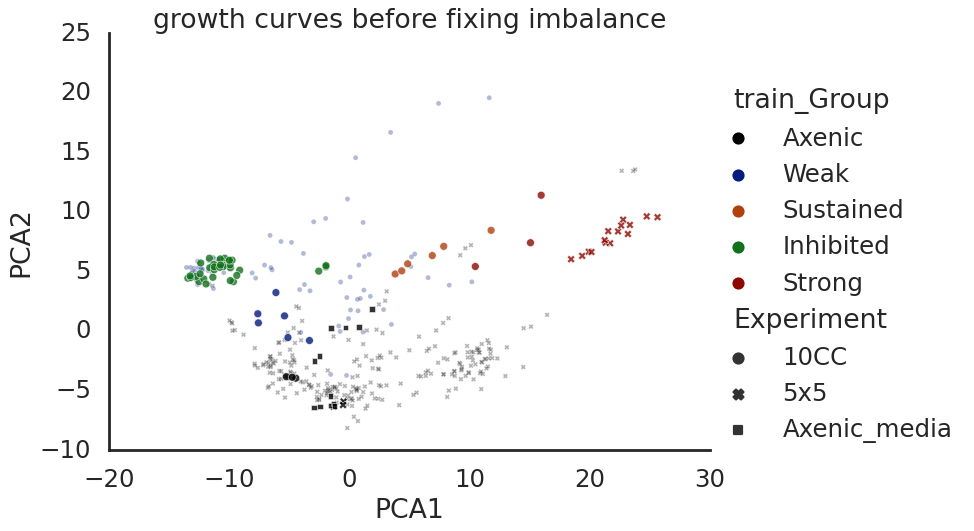

In [65]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    alpha=0.3, 
    zorder=-3,
    
    hue='Experiment', hue_order=eorder, palette=epalette,
    s=20, legend=False,
)
plt.title('growth curves before fixing imbalance')

In [66]:
pcadf.train_Group.value_counts()


Other        333
Inhibited     36
Axenic        18
Strong        18
Sustained      6
Weak           6
Name: train_Group, dtype: int64

# imbalance

In [67]:
from sklearn.model_selection import train_test_split
X_train_before_smt, X_test_before_smt, y_train_before_smt, y_test_before_smt = train_test_split(
    X_logged, y, test_size=0.5, stratify=y, random_state=43
)

X_train_before_smt = X_logged
y_train_before_smt = y
X_test_before_smt = X_logged
y_test_before_smt = y
X_train_before_smt.shape, y_train_before_smt.shape, X_test_before_smt.shape, y_test_before_smt.shape

((417, 126), (417,), (417, 126), (417,))

In [68]:
np.unique(y_train_before_smt, return_counts=True), np.unique(y_test_before_smt, return_counts=True)

((array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
        dtype=object),
  array([ 18,  36, 333,  18,   6,   6])),
 (array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
        dtype=object),
  array([ 18,  36, 333,  18,   6,   6])))

In [69]:
tdf  = X_test_before_smt.reset_index()
tdf.loc[~tdf.train_Group.isin(['Other'])].sort_values('train_Group')

train_Group       Sample         id         full name   Group  \
day                                                                 
0        Axenic          1A0          1            Axenic  Axenic   
16       Axenic  Ax_Media_D5  MED4_lowN  Axenic_MED4_lowN  Axenic   
15       Axenic  Ax_Media_D4  MED4_lowN  Axenic_MED4_lowN  Axenic   
14       Axenic  Ax_Media_C6  MED4_lowN  Axenic_MED4_lowN  Axenic   
13       Axenic  Ax_Media_C5  MED4_lowN  Axenic_MED4_lowN  Axenic   
..          ...          ...        ...               ...     ...   
411        Weak         10A0         10     Marinovum 5F3    Weak   
412        Weak         10B0         10     Marinovum 5F3    Weak   
413        Weak         10C0         10     Marinovum 5F3    Weak   
414        Weak         11A0         11   Roseovarius 5C3    Weak   
416        Weak         11C0         11   Roseovarius 5C3    Weak   

       Experiment ref_Bp[C]                                      \
day                     0.0 1.081944444442343 2.164583333331393   
0            10CC  2.941999          1.664338          3.206882   
16   Axenic_media  3.871319          3.935720          4.445485   
15   Axenic_media  3.690937          3.829887          4.324501   
14   Axenic_media  2.592325          2.001850          2.302579   
13   Axenic_media  2.917101          2.936514          2.379010   
..            ...       ...               ...               ...   
411          10CC  2.248851          2.615314          2.933768   
412          10CC  2.386473          1.470182          3.141924   
413          10CC  2.820109          2.386473          3.050633   
414          10CC  2.520004          2.733097          3.206882   
416          10CC  2.163329          2.069803          2.810806   

                       ...         ref_Bp[N]                    \
day 2.747222222220444  ... 73.76874999999563 76.93958333333285   
0            3.562928  ...          0.000000          0.000000   
16           4.787957  ...          0.000000          0.000000   
15           4.694573  ...          0.000000          0.000000   
14           2.107133  ...          0.000000          0.000000   
13           2.042619  ...          0.000000          0.000000   
..                ...  ...               ...               ...   
411          3.379725  ...          0.000000          0.000000   
412          3.589016  ...          0.000000          0.198371   
413          3.706322  ...          0.097275          0.000000   
414          3.626915  ...          0.000000          0.118328   
416          3.028327  ...          0.374262          0.198371   

                                                                     \
day 79.79513888888323 80.88888888888323 81.95833333332848  84.21875   
0            0.000000          0.000000          0.118328  0.000000   
16           0.000000          0.000000          0.000000  0.000000   
15           0.000000          0.000000          0.000000  0.000000   
14           0.000000          0.000000          0.000000  0.000000   
13           0.000000          0.000000          0.000000  0.000000   
..                ...               ...               ...       ...   
411          0.000000          0.000000          0.000000  0.000000   
412          0.000000          0.031317          0.031317  0.118328   
413          0.000000          0.390262          0.000000  0.307570   
414          0.217419          0.000000          0.537587  0.000000   
416          0.118328          0.217419          0.000000  0.118328   

                                                                   
day 86.8923611111095 87.7944444444438 88.74861111110658      91.0  
0           0.000000         0.000000          0.000000  0.000000  
16          0.000000         0.000000          0.000000  0.000000  
15          0.161723         0.023313          0.000000  0.000000  
14          0.503513         0.291875          0.005115  0.000000  
13          0.195699         0.111419      

In [70]:
 #sampling_strategy = {'Axenic' :100, 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],

In [71]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
#over_sampler =  RandomOverSampler()
smoteenn = SMOTEENN(
    smote=SMOTE(k_neighbors=5), 
    enn=EditedNearestNeighbours(sampling_strategy=['Other'], n_neighbors=50),
)
X_smt, y_smt = smoteenn.fit_resample(X_train_before_smt, y_train_before_smt)

In [72]:
y_train_before_smt.value_counts()

Other        333
Inhibited     36
Axenic        18
Strong        18
Sustained      6
Weak           6
Name: train_Group, dtype: int64

In [73]:
np.unique(y_smt, return_counts=True)

(array(['Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak'],
       dtype=object),
 array([333, 333,  82, 333, 333, 333]))

In [74]:
from sklearn.decomposition import PCA
pca = Pipeline([
    ('scale', StandardScaler()),    
    ('clf', PCA(n_components=2))
],
    memory='/tmp/Osnat/sklearn_cache',
)


In [75]:
X_smt

ref_Bp[C]                                                              \
day  0.000000  1.081944  2.164583  2.747222  3.754167  4.701389  5.720139    
0     2.941999  1.664338  3.206882  3.562928  3.861563  4.410855  5.071401   
1     2.312365  2.265112  3.114711  3.567323  3.927938  4.446076  5.026550   
2     3.336475  2.296861  3.181403  3.540655  4.029622  4.594747  5.116191   
3     3.128410  3.473007  3.496992  3.863040  4.306625  4.598239  4.838864   
4     3.093805  3.431326  3.632048  3.765560  4.269186  4.602013  4.867820   
...        ...       ...       ...       ...       ...       ...       ...   
1742  2.664114  2.056849  3.083473  3.664123  3.860822  4.209431  4.237098   
1743  2.677847  2.085867  3.080582  3.667838  3.873216  4.251529  4.300754   
1744  2.617550  2.467616  3.009194  3.590516  3.914076  4.369509  4.426853   
1745  2.564475  2.229906  3.064466  3.425409  3.296471  3.945422  4.232228   
1746  2.477354  2.329718  3.186134  3.614810  3.807472  4.075958  4.167780   

                                    ... ref_Bp[N]                      \
day  6.731944  7.984028  8.943750   ... 73.768750 76.939583 79.795139   
0     5.449641  6.038614  5.927432  ...  0.000000  0.000000  0.000000   
1     5.520309  6.110444  5.978291  ...  0.000000  0.000000  0.000000   
2     5.582031  6.159890  5.824599  ...  0.000000  0.198371  0.000000   
3     5.042448  5.415113  5.628983  ...  0.258356  0.000000  0.000000   
4     5.089353  5.502304  5.732869  ...  0.000000  0.000000  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
1742  4.279095  3.451999  3.579474  ...  0.062281  0.071361  0.000000   
1743  4.361579  3.523365  3.608246  ...  0.065362  0.065079  0.000000   
1744  4.483749  3.217833  3.543421  ...  0.062783  0.000000  0.000000   
1745  4.488707  3.590422  3.653374  ...  0.000000  0.018066  0.299589   
1746  4.251935  3.465700  3.716765  ...  0.000000  0.143894  0.147975   

                                                                            
day  80.888889 81.958333 84.218750 86.892361 87.794444 88.748611 91.000000  
0     0.000000  0.118328  0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000  0.000000  0.008327  0.000000  0.324665  
2     0.008327  0.000000  0.000000  0.000000  0.217419  0.008327  0.000000  
3     0.094714  0.036657  0.000000  0.000000  0.000000  0.000000  0.011007  
4     0.000000  0.243209  0.768567  0.000000  0.000000  0.000000  0.000000  
...        ...       ...       ...       ...       ...       ...       ...  
1742  0.261136  0.011266  0.239493  0.000000  0.005332  0.000000  0.049985  
1743  0.272504  0.010274  0.245486  0.000000  0.005595  0.000000  0.045584  
1744  0.251881  0.000000  0.198511  0.000000  0.005375  0.000000  0.000000  
1745  0.355710  0.047595  0.538614  0.010476  0.057888  0.467520  0.028544  
1746  0.010003  0.375882  0.037794  0.080534  0.445005  0.428200  0.044380  

[1747 rows x 126 columns]

In [76]:
Xpca = pca.fit_transform(X_logged)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'], index=X_logged.index)
pcadf.reset_index(inplace=True)


In [77]:
pcadf.loc[pcadf.train_Group.isin(['Axenic'])].nlargest(n=10,columns='PCA1')


,train_Group,Sample,id,full name,Group,Experiment,PCA1,PCA2
8,Axenic,Ax_Media_A6,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,1.865391,1.825106
12,Axenic,Ax_Media_C4,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,0.821597,0.295823
7,Axenic,Ax_Media_A5,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-0.304876,0.238995
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,-0.481568,-5.954584
5,Axenic,5x5_30C0,MED4_Ax_Pro,Axenic,Axenic,5x5,-0.524767,-6.251014
11,Axenic,Ax_Media_B6,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-1.238334,-6.327266
10,Axenic,Ax_Media_B5,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-1.306384,-6.122391
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,-1.317278,-6.377511
6,Axenic,Ax_Media_A4,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-1.520716,0.201093
9,Axenic,Ax_Media_B4,MED4_lowN,Axenic_MED4_lowN,Axenic,Axenic_media,-1.526161,-6.295878


In [78]:
pcadf.loc[pcadf.train_Group.isin(['Inhibited'])].nlargest(n=10,columns='PCA1')


,train_Group,Sample,id,full name,Group,Experiment,PCA1,PCA2
30,Inhibited,3C0,3,Marinobacter adhaerens HP15,Inhibited,10CC,-1.940527,5.445816
24,Inhibited,3B0,3,Marinobacter adhaerens HP15,Inhibited,10CC,-1.952779,5.344228
18,Inhibited,3A0,3,Marinobacter adhaerens HP15,Inhibited,10CC,-2.544920,4.981863
32,Inhibited,3C2,3,Marinobacter adhaerens HP15,Inhibited,10CC,-9.118222,5.060851
42,Inhibited,4B0,4,Phaeobacter gallaeciensis,Inhibited,10CC,-9.359171,4.622557
36,Inhibited,4A0,4,Phaeobacter gallaeciensis,Inhibited,10CC,-9.640395,4.096165
34,Inhibited,3C4,3,Marinobacter adhaerens HP15,Inhibited,10CC,-9.753796,5.908486
25,Inhibited,3B1,3,Marinobacter adhaerens HP15,Inhibited,10CC,-9.889727,5.269306
48,Inhibited,4C0,4,Phaeobacter gallaeciensis,Inhibited,10CC,-9.898958,4.185277
31,Inhibited,3C1,3,Marinobacter adhaerens HP15,Inhibited,10CC,-9.920139,5.498783


Text(0.5, 1.0, 'growth curves before fixing imbalance')

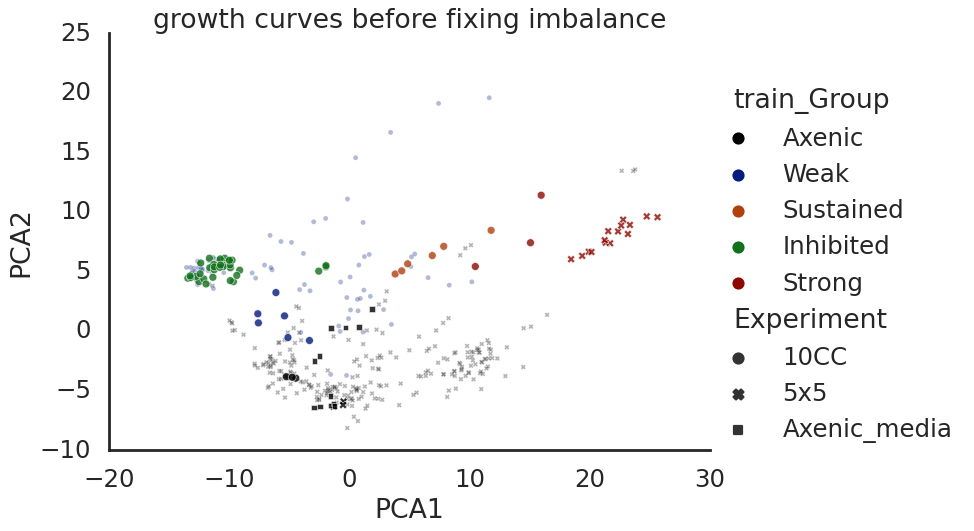

In [79]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  style='Experiment', 
    alpha=0.3, 
    zorder=-3,
    
    hue='Experiment', hue_order=eorder, palette=epalette,
    s=20, legend=False,
)
plt.title('growth curves before fixing imbalance')

In [80]:
Xpca = pca.fit_transform(X_smt)
pcadf = pd.DataFrame(Xpca, columns=['PCA1', 'PCA2'])
pcadf['train_Group'] = y_smt


Text(0.5, 1.0, 'growth curves after fixing imbalance')

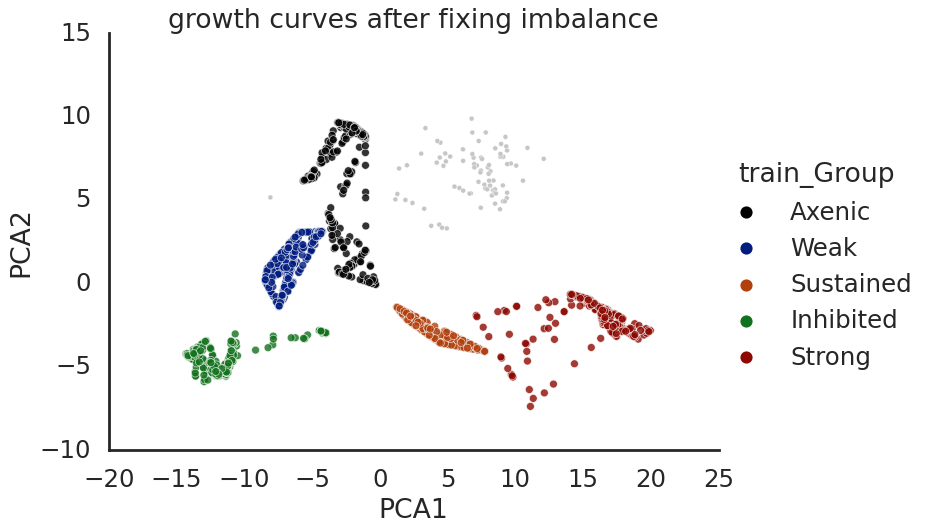

In [81]:
plt.rcParams["legend.markerscale"] = 2
sns.relplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[-5:])]
    , x='PCA1', y='PCA2',  
    aspect=1.4, alpha=0.8, height=7,
    hue='train_Group', hue_order=tgorder[-5:], palette=tgpalette[-5:],
    s=50,
)
sns.scatterplot(
    data=pcadf.loc[pcadf.train_Group.isin(tgorder[:-5])]
    , x='PCA1', y='PCA2',  
    alpha=1, 
    #zorder=-3,
    
    hue='train_Group', hue_order=tgorder[:-5], palette=tgpalette[:-5],
    s=20, legend=False,
)
plt.title('growth curves after fixing imbalance')

# Compute features

In [82]:
def _X_smt2df(X_smt):
    # do exponent to recover 'original' values
    x= np.exp(X_smt)
    x = x.T.melt(ignore_index=False, var_name='smt_id',).reset_index()
    x = x.pivot(index=['smt_id', 'day'], values='value', columns='level_0').reset_index()
    return x

df_smt = _X_smt2df(X_smt)

In [83]:
df_smt

level_0,smt_id,day,ref_Bp[C],ref_Bp[N]
0,0,0.000000,18.953691,2.860934
1,0,1.081944,5.282176,1.000000
2,0,2.164583,24.701941,3.728595
3,0,2.747222,35.266293,5.323214
4,0,3.754167,47.539584,7.175786
...,...,...,...,...
110056,1746,84.218750,5.292140,1.038518
110057,1746,86.892361,5.546501,1.083865
110058,1746,87.794444,8.717175,1.560499
110059,1746,88.748611,8.460860,1.534493


In [84]:
X_smt_features = ml.compute_features(df_smt,groupby_cols=['smt_id'])

In [85]:
X_smt_features

,max_Nday,max_Nbiomass,max_Cday,max_Cbiomass,std_30-60days_Nbiomass,median_30-60days_Nbiomass,mean_30-60days_Nbiomass,std_30-60days_Cbiomass,median_30-60days_Cbiomass,mean_30-60days_Cbiomass,std_60-80days_Nbiomass,median_60-80days_Nbiomass,mean_60-80days_Nbiomass,std_60-80days_Cbiomass,median_60-80days_Cbiomass,mean_60-80days_Cbiomass,last_dayN,last_dayC,D90_dayN,D90_dayC
smt_id,,,,,,,,,,,,,,,,,,,,
0,7.984028,63.292311,7.984028,419.311563,0.130226,1.000000,1.053290,2.838173,3.806274,4.233329,0.000000,1.000000,1.000000,1.813680,3.728595,3.147041,27.852778,91.000000,15.914583,15.914583
1,7.984028,68.005818,7.984028,450.538545,0.175714,1.000000,1.052927,3.031926,3.107162,3.836987,0.000000,1.000000,1.000000,1.522446,2.175014,2.343266,25.734722,91.000000,12.794444,12.794444
2,7.984028,71.453010,7.984028,473.376189,0.000000,1.000000,1.000000,1.872630,3.625023,3.107607,0.100776,1.000000,1.068856,2.519618,5.126818,5.195866,26.747222,88.748611,12.794444,12.794444
3,13.695833,176.144498,13.695833,1166.957299,0.159291,1.000000,1.074519,2.458807,4.416402,5.062721,0.178214,1.000000,1.086577,3.145020,3.289182,4.205732,26.747222,91.000000,10.202778,10.202778
4,13.695833,165.971655,13.695833,1099.562214,0.247444,1.000000,1.131903,3.037455,6.589951,6.065461,0.196796,1.000000,1.073821,2.829604,4.545228,5.185789,84.218750,91.000000,12.038889,12.038889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,6.731944,10.894357,6.731944,72.175115,0.190404,1.146980,1.177778,2.509260,5.377606,5.651019,0.049144,1.000000,1.031001,2.109444,5.672057,4.755397,27.852778,91.000000,24.344444,23.052083
1743,6.731944,11.831059,6.731944,78.380768,0.198605,1.154793,1.186157,2.531970,5.502511,5.794228,0.050680,1.000000,1.031443,2.102224,5.692071,4.809056,27.852778,91.000000,24.344444,23.052083
1744,6.731944,13.368466,6.731944,88.566086,0.218111,1.148248,1.192878,2.936425,5.592739,6.056807,0.047610,1.000000,1.022975,1.640726,5.015940,4.603967,27.852778,91.000000,23.052083,23.052083


In [86]:
X_train, forest_features, logistic_Nfeatures, logistic_Cfeatures = ml.df2finalX(df_smt, groupby_cols=['smt_id'])

In [87]:
X_test, _, _, _ = ml.df2finalX(refdf_interpolate, groupby_cols=groupby_cols)

In [88]:
y_test = X_test.index.get_level_values(0)
y_test

Index(['Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic', 'Axenic',
       'Axenic', 'Axenic', 'Axenic',
       ...
       'Sustained', 'Sustained', 'Sustained', 'Sustained', 'Weak', 'Weak',
       'Weak', 'Weak', 'Weak', 'Weak'],
      dtype='object', name='train_Group', length=417)

In [89]:
forest_features

Index(['max_Nday', 'max_Nbiomass', 'max_Cday', 'max_Cbiomass',
       'std_30-60days_Nbiomass', 'median_30-60days_Nbiomass',
       'mean_30-60days_Nbiomass', 'std_30-60days_Cbiomass',
       'median_30-60days_Cbiomass', 'mean_30-60days_Cbiomass',
       'std_60-80days_Nbiomass', 'median_60-80days_Nbiomass',
       'mean_60-80days_Nbiomass', 'std_60-80days_Cbiomass',
       'median_60-80days_Cbiomass', 'mean_60-80days_Cbiomass', 'last_dayN',
       'last_dayC', 'D90_dayN', 'D90_dayC'],
      dtype='object')

In [90]:
y_smt

array(['Axenic', 'Axenic', 'Axenic', ..., 'Weak', 'Weak', 'Weak'],
      dtype=object)

In [91]:
pd.Series(y_smt).value_counts()

Axenic       333
Inhibited    333
Strong       333
Sustained    333
Weak         333
Other         82
dtype: int64

In [92]:
y_train = y_smt

In [93]:
logistic_Cfeatures, logistic_Nfeatures, forest_features

(['ref_Bp[C]_0.0',
  'ref_Bp[C]_1.1',
  'ref_Bp[C]_2.2',
  'ref_Bp[C]_2.7',
  'ref_Bp[C]_3.8',
  'ref_Bp[C]_4.7',
  'ref_Bp[C]_5.7',
  'ref_Bp[C]_6.7',
  'ref_Bp[C]_8.0',
  'ref_Bp[C]_8.9',
  'ref_Bp[C]_9.7',
  'ref_Bp[C]_10.8',
  'ref_Bp[C]_11.7',
  'ref_Bp[C]_12.8',
  'ref_Bp[C]_13.7',
  'ref_Bp[C]_16.1',
  'ref_Bp[C]_16.7',
  'ref_Bp[C]_17.7',
  'ref_Bp[C]_18.7',
  'ref_Bp[C]_19.7',
  'ref_Bp[C]_20.8',
  'ref_Bp[C]_21.9',
  'ref_Bp[C]_23.9',
  'ref_Bp[C]_25.7',
  'ref_Bp[C]_26.7',
  'ref_Bp[C]_27.9',
  'ref_Bp[C]_29.8',
  'ref_Bp[C]_31.1',
  'ref_Bp[C]_31.8',
  'ref_Bp[C]_32.8',
  'ref_Bp[C]_33.7',
  'ref_Bp[C]_34.8',
  'ref_Bp[C]_36.9',
  'ref_Bp[C]_37.8',
  'ref_Bp[C]_39.9',
  'ref_Bp[C]_40.8',
  'ref_Bp[C]_41.8',
  'ref_Bp[C]_44.8',
  'ref_Bp[C]_46.8',
  'ref_Bp[C]_47.9',
  'ref_Bp[C]_48.8',
  'ref_Bp[C]_49.9',
  'ref_Bp[C]_51.8',
  'ref_Bp[C]_53.0',
  'ref_Bp[C]_54.8',
  'ref_Bp[C]_58.8',
  'ref_Bp[C]_59.9',
  'ref_Bp[C]_62.9',
  'ref_Bp[C]_65.7',
  'ref_Bp[C]_67.0',
  'ref_Bp[C

# Stacking classifier

The goal is to create multiple classifiers:
1. randomforest based on generated features: last day, max day, max value, mean late biomass (N & C), std late biomass (N & C)
2. logical regression based on N biomass
3. logical regression based on C biomass
4. tslearn based on N biomass 
5. tslearn based on C biomass 

and than combine the results using a stacking classifier

# stack

In [94]:
stack = ml.build_classifier(forest_features, logistic_Nfeatures, logistic_Cfeatures, y_train)

stack

StackingClassifier(estimators=[('logisticN',
                                Pipeline(memory='/tmp/Osnat/sklearn_cache',
                                         steps=[('select',
                                                 ColumnTransformer(transformers=[('sel',
                                                                                  'passthrough',
                                                                                  ['ref_Bp[N]_0.0',
                                                                                   'ref_Bp[N]_1.1',
                                                                                   'ref_Bp[N]_2.2',
                                                                                   'ref_Bp[N]_2.7',
                                                                                   'ref_Bp[N]_3.8',
                                                                                   'ref_Bp[N]_4.7',
                                                                                   'ref_Bp[N]_5.7',
                                                                                   'ref_Bp[N]_6.7',
                                                                                   'ref_Bp[N]_8.0',
                                                                                   'ref_Bp[N]_8.9',
                                                                                   'ref_Bp[N]_9.7',
                                                                                   'ref_Bp[N]_10.8'...
       'mean_60-80days_Nbiomass', 'std_60-80days_Cbiomass',
       'median_60-80days_Cbiomass', 'mean_60-80days_Cbiomass', 'last_dayN',
       'last_dayC', 'D90_dayN', 'D90_dayC'],
      dtype='object'))])),
                                                ('scale', StandardScaler()),
                                                ('clf',
                                                 RandomForestClassifier(ccp_alpha=0.05,
                                                                        class_weight={0: 100,
                                                                                      1: 10000,
                                                                                      2: 1,
                                                                                      3: 10000,
                                                                                      4: 10000,
                                                                                      5: 100}))]))],
                   final_estimator=LogisticRegression(), n_jobs=-1,
                   verbose=True)

In [95]:
stack.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:370: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:370: UserWarning: Persisting input arguments took 0.55s to run.
If this happens often in your code, it can cause performance pr

StackingClassifier(estimators=[('logisticN',
                                Pipeline(memory='/tmp/Osnat/sklearn_cache',
                                         steps=[('select',
                                                 ColumnTransformer(transformers=[('sel',
                                                                                  'passthrough',
                                                                                  ['ref_Bp[N]_0.0',
                                                                                   'ref_Bp[N]_1.1',
                                                                                   'ref_Bp[N]_2.2',
                                                                                   'ref_Bp[N]_2.7',
                                                                                   'ref_Bp[N]_3.8',
                                                                                   'ref_Bp[N]_4.7',
                                                                                   'ref_Bp[N]_5.7',
                                                                                   'ref_Bp[N]_6.7',
                                                                                   'ref_Bp[N]_8.0',
                                                                                   'ref_Bp[N]_8.9',
                                                                                   'ref_Bp[N]_9.7',
                                                                                   'ref_Bp[N]_10.8'...
       'mean_60-80days_Nbiomass', 'std_60-80days_Cbiomass',
       'median_60-80days_Cbiomass', 'mean_60-80days_Cbiomass', 'last_dayN',
       'last_dayC', 'D90_dayN', 'D90_dayC'],
      dtype='object'))])),
                                                ('scale', StandardScaler()),
                                                ('clf',
                                                 RandomForestClassifier(ccp_alpha=0.05,
                                                                        class_weight={0: 100,
                                                                                      1: 10000,
                                                                                      2: 1,
                                                                                      3: 10000,
                                                                                      4: 10000,
                                                                                      5: 100}))]))],
                   final_estimator=LogisticRegression(), n_jobs=-1,
                   verbose=True)

<Axes: xlabel='Importance', ylabel='Feature'>

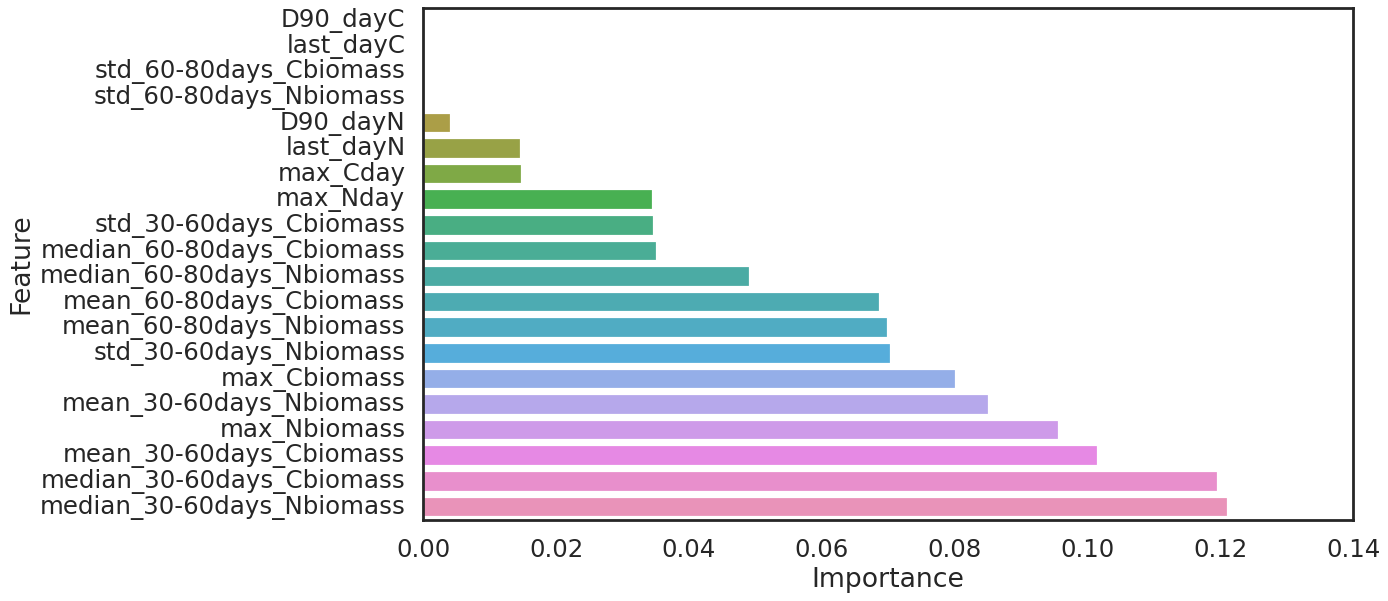

In [96]:


forest_importance_df = pd.DataFrame(dict(
    Feature=forest_features, 
    Importance=stack.estimators_[2].named_steps['clf'].feature_importances_
    ))
forest_importance_df =forest_importance_df.sort_values('Importance')
                                    
sns.barplot(data=forest_importance_df, y='Feature', x='Importance')


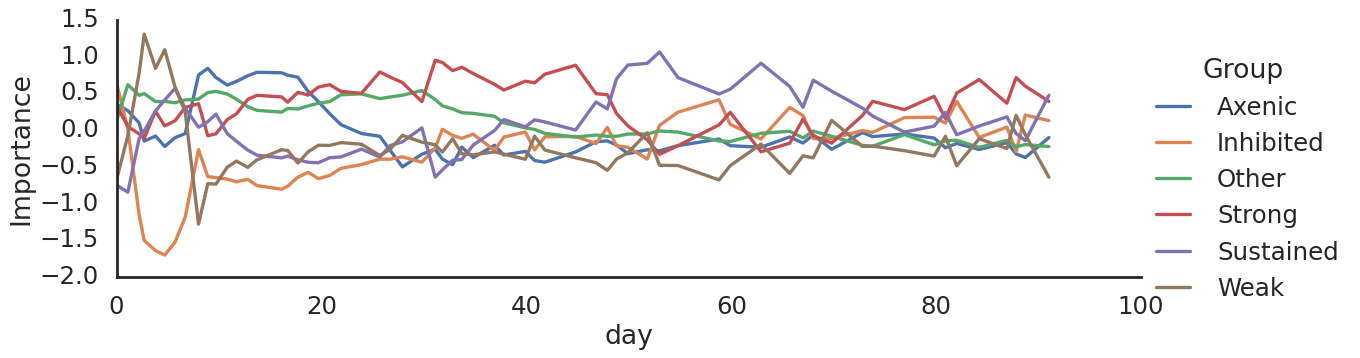

In [97]:
logN_coefdf = pd.DataFrame(
    stack.estimators_[0].named_steps['clf'].coef_.T, index=logistic_Nfeatures,
    columns=stack.classes_,
).reset_index().melt(id_vars='index', value_name='Importance', var_name='Group').rename(columns={'index': 'Feature'})
logN_coefdf[['_', 'day']] = logN_coefdf.Feature.str.rsplit('_', expand=True, n=1)
logN_coefdf['day'] = pd.to_numeric(logN_coefdf['day'])
logN_coefdf
sns.relplot(data=logN_coefdf, x='day', y='Importance', aspect=3,
            hue='Group', kind='line'
           )

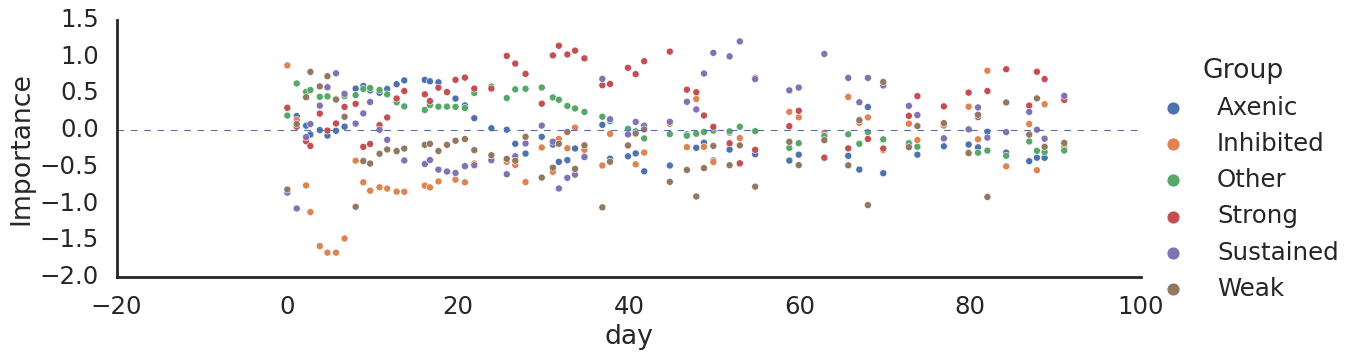

In [98]:
logC_coefdf = pd.DataFrame(
    stack.estimators_[1].named_steps['clf'].coef_.T, index=logistic_Cfeatures,
    columns=stack.classes_,
).reset_index().melt(id_vars='index', value_name='Importance', var_name='Group').rename(columns={'index': 'Feature'})
logC_coefdf[['_', 'day']] = logC_coefdf.Feature.str.rsplit('_', expand=True, n=1)
logC_coefdf['day'] = pd.to_numeric(logC_coefdf['day'])
logC_coefdf
sns.relplot(data=logC_coefdf, x='day', y='Importance', aspect=3,
            hue='Group', #kind='line'
            
            s=40,
           )
plt.axhline(0, ls='--', lw=1)

In [99]:
y_pred_prop = stack.predict_proba(X_test)
y_pred = stack.predict(X_test)

In [100]:
y_pred_prop

array([[9.86878194e-01, 2.11740967e-03, 7.02246616e-03, 9.28199111e-04,
        1.25876922e-03, 1.79496191e-03],
       [9.86808122e-01, 2.12794240e-03, 7.05280700e-03, 9.32904576e-04,
        1.26510692e-03, 1.81311665e-03],
       [9.86838558e-01, 2.12330577e-03, 7.03965742e-03, 9.30863465e-04,
        1.26231114e-03, 1.80530433e-03],
       ...,
       [1.62079853e-03, 2.13412658e-03, 3.86643980e-03, 8.52382072e-04,
        1.25756249e-03, 9.90268691e-01],
       [1.61232765e-03, 2.13362211e-03, 3.85808633e-03, 8.51008171e-04,
        1.25603763e-03, 9.90288918e-01],
       [1.63749806e-03, 2.20679474e-03, 3.91875142e-03, 8.65458755e-04,
        1.27838533e-03, 9.90093112e-01]])

In [101]:
from sklearn.metrics import balanced_accuracy_score
#print(pipe_forest.score(X_train, y_train), pipe_forest.score(X_test, y_test))
print(balanced_accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8768768768768768
              precision    recall  f1-score   support

      Axenic       0.12      1.00      0.21        18
   Inhibited       0.35      1.00      0.52        36
       Other       1.00      0.26      0.41       333
      Strong       0.58      1.00      0.73        18
   Sustained       0.50      1.00      0.67         6
        Weak       0.19      1.00      0.32         6

    accuracy                           0.41       417
   macro avg       0.46      0.88      0.48       417
weighted avg       0.87      0.41      0.43       417



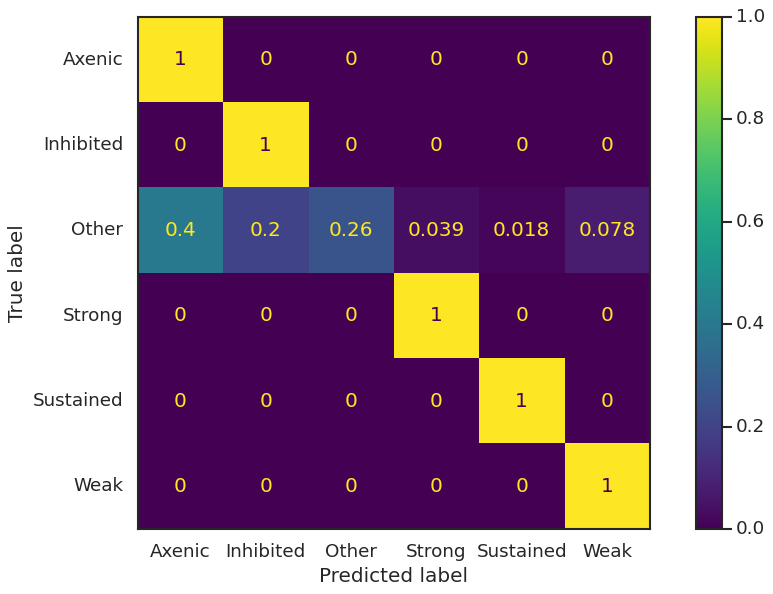

In [102]:
sns.set_context('talk')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=y_pred, normalize='true')
#plt.xlim((0,30))

In [103]:
X_test

max_Nday  \
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         7.984028   
            1B0      1           Axenic          Axenic 10CC         7.984028   
            1C0      1           Axenic          Axenic 10CC         7.984028   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         3.754167   
            10C0     10          Marinovum 5F3   Weak   10CC         6.731944   
            11A0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11B0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11C0     11          Roseovarius 5C3 Weak   10CC         4.701389   

                                                                    max_Nbiomass  \
train_Group Sample   id          full name       Group  Experiment                 
Axenic      1A0      1           Axenic          Axenic 10CC           63.292311   
            1B0      1           Axenic          Axenic 10CC           68.005818   
            1C0      1           Axenic          Axenic 10CC           71.453010   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5           176.144498   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5           165.971655   
...                                                                          ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC            5.581167   
            10C0     10          Marinovum 5F3   Weak   10CC           27.804218   
            11A0     11          Roseovarius 5C3 Weak   10CC           22.895292   
            11B0     11          Roseovarius 5C3 Weak   10CC           12.756953   
            11C0     11          Roseovarius 5C3 Weak   10CC            6.401927   

                                                                     max_Cday  \
train_Group Sample   id          full name       Group  Experiment              
Axenic      1A0      1           Axenic          Axenic 10CC         7.984028   
            1B0      1           Axenic          Axenic 10CC         7.984028   
            1C0      1           Axenic          Axenic 10CC         7.984028   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5         13.695833   
...                                                                       ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC         3.754167   
            10C0     10          Marinovum 5F3   Weak   10CC         6.731944   
            11A0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11B0     11          Roseovarius 5C3 Weak   10CC         6.731944   
            11C0     11          Roseovarius 5C3 Weak   10CC         4.701389   

                                                                    max_Cbiomass  \
train_Group Sample   id          full name       Group  Experiment                 
Axenic      1A0      1           Axenic          Axenic 10CC          419.311563   
            1B0      1           Axenic          Axenic 10CC          450.538545   
            1C0      1           Axenic          Axenic 10CC          473.376189   
            5x5_30A0 MED4_Ax_Pro Axenic          Axenic 5x5          1166.957299   
            5x5_30B0 MED4_Ax_Pro Axenic          Axenic 5x5          1099.562214   
...                                                                          ...   
Weak        10B0     10          Marinovum 5F3   Weak   10CC           36.975232   
            10C0     10          Marinovum 5F3   Weak   10CC          184.202943   
            11A0     11     

In [104]:
df_predicted = pd.DataFrame(y_pred_prop, columns=stack.classes_)
df_predicted['y'] = y_test
df_predicted['y_pred'] = y_pred

df_predicted.index = X_test.index
df_predicted = df_predicted.reset_index()
df_predicted


,train_Group,Sample,id,full name,Group,Experiment,Axenic,Inhibited,Other,Strong,Sustained,Weak,y,y_pred
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.986878,0.002117,0.007022,0.000928,0.001259,0.001795,Axenic,Axenic
1,Axenic,1B0,1,Axenic,Axenic,10CC,0.986808,0.002128,0.007053,0.000933,0.001265,0.001813,Axenic,Axenic
2,Axenic,1C0,1,Axenic,Axenic,10CC,0.986839,0.002123,0.007040,0.000931,0.001262,0.001805,Axenic,Axenic
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.987069,0.002115,0.006876,0.000977,0.001201,0.001761,Axenic,Axenic
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.987047,0.002118,0.006890,0.000978,0.001203,0.001764,Axenic,Axenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Weak,10B0,10,Marinovum 5F3,Weak,10CC,0.001615,0.002148,0.003868,0.000853,0.001259,0.990257,Weak,Weak
413,Weak,10C0,10,Marinovum 5F3,Weak,10CC,0.001654,0.002122,0.004015,0.000996,0.001303,0.989908,Weak,Weak
414,Weak,11A0,11,Roseovarius 5C3,Weak,10CC,0.001621,0.002134,0.003866,0.000852,0.001258,0.990269,Weak,Weak
415,Weak,11B0,11,Roseovarius 5C3,Weak,10CC,0.001612,0.002134,0.003858,0.000851,0.001256,0.990289,Weak,Weak


In [105]:
df_predicted.columns

Index(['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
       'Axenic', 'Inhibited', 'Other', 'Strong', 'Sustained', 'Weak', 'y',
       'y_pred'],
      dtype='object')

In [106]:
mdf_predicted = df_predicted.melt(
    id_vars=['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',
        'y', 'y_pred'], 
    var_name='predicted', value_name='prob')
#mdf_predicted.predicted = pd.to_numeric(mdf_predicted.predicted)
mdf_predicted['predicted_correctly'] = (mdf_predicted['y'] == mdf_predicted['predicted']).map({
    True: 'correct prediction', False: 'false prediction'
})



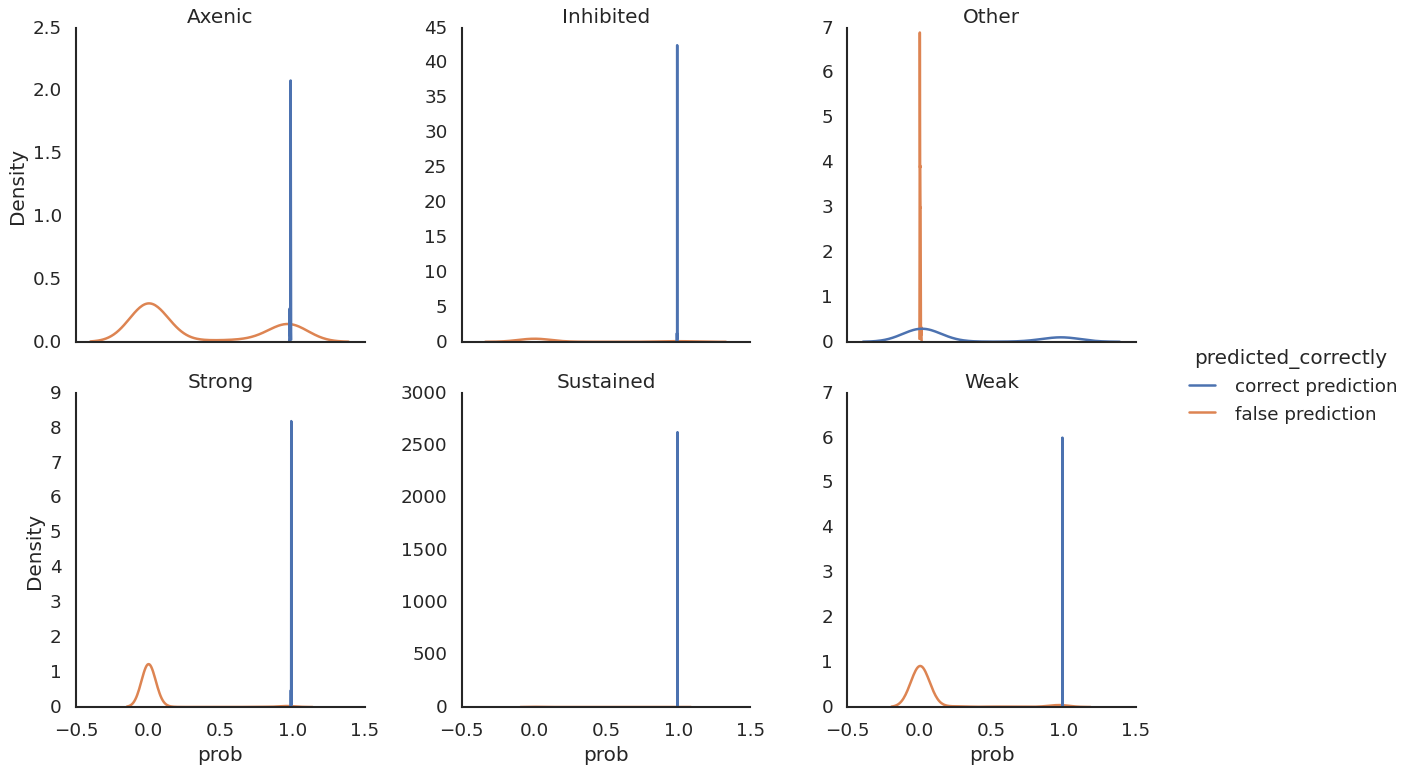

In [107]:
g=sns.displot(data=mdf_predicted, #.loc[mdf_predicted.predicted.isin([3])], 
            x='prob',
            kind='kde',
            col='predicted',
            hue='predicted_correctly',
            col_wrap=3,
              #stat='percent',
              #log_scale=True,
          #clip=(0,1),
              facet_kws=dict(sharey=False),
           )
g.set_titles(col_template='{col_name}')
#g.set(yscale='log')

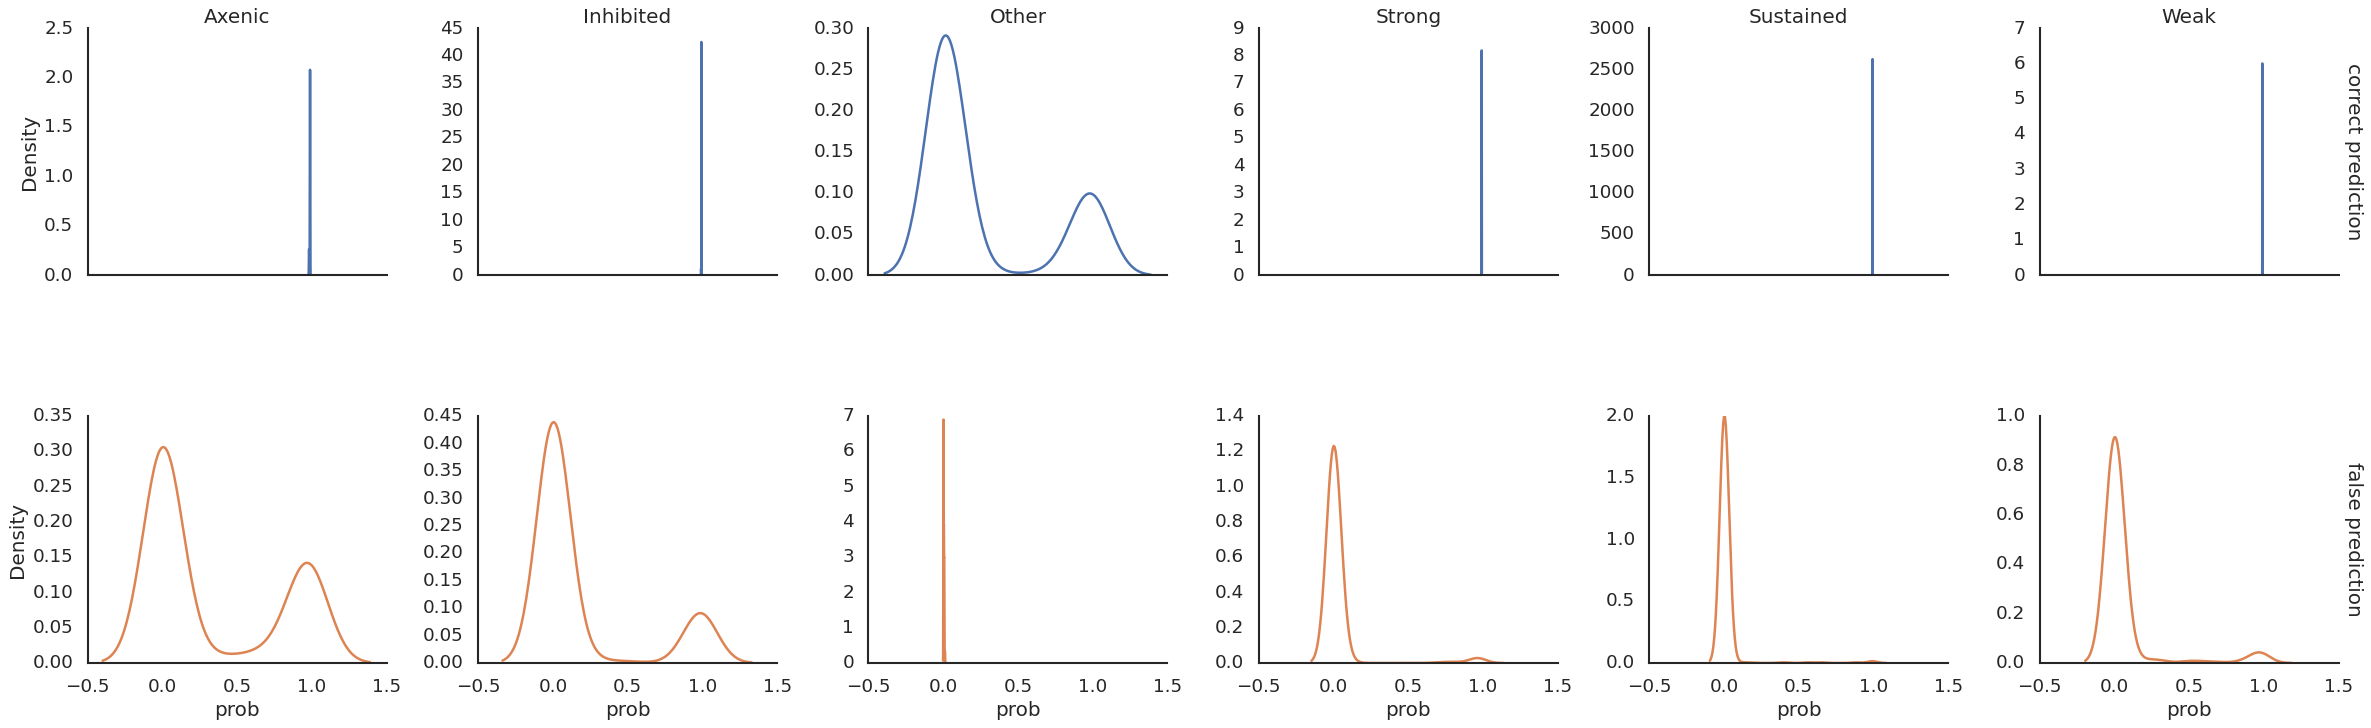

In [108]:
g=sns.displot(data=mdf_predicted, #.loc[mdf_predicted.predicted_correctly.isin([True])], 
            x='prob',
            kind='kde',
            col='predicted',
            row='predicted_correctly',
            hue='predicted_correctly',
            #col_wrap=3,
              #stat='percent',
              #log_scale=True,
          #clip=(0,1),
              legend=False,
              facet_kws=dict(sharey=False, margin_titles=True),
           )
g.set_titles(col_template='{col_name}', row_template='{row_name}', )
#g.set(yscale='log')

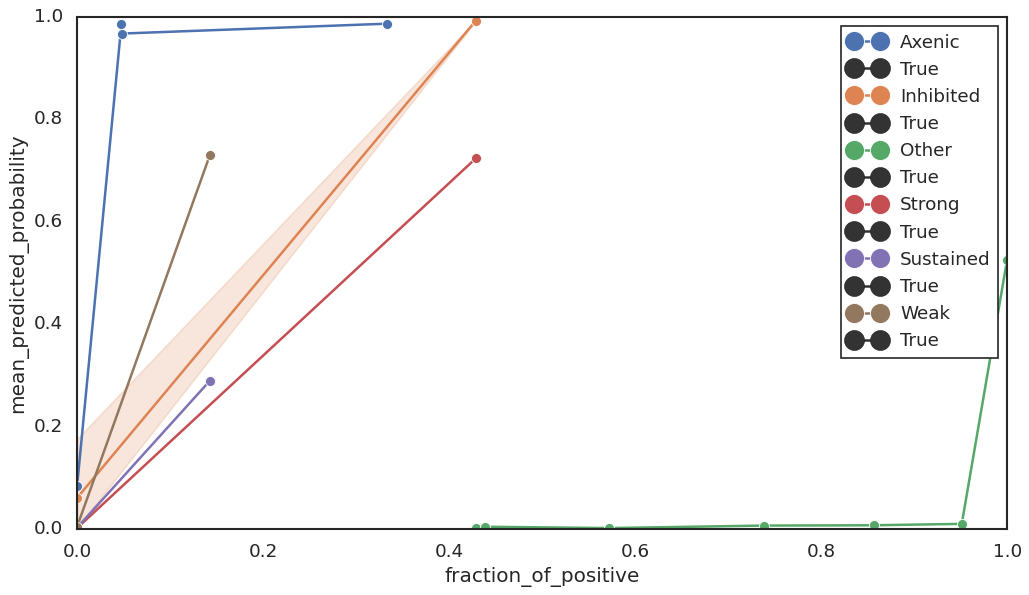

In [109]:
from sklearn.calibration import calibration_curve
for class_ in stack.classes_:
    sns.lineplot(
    #sns.scatterplot(
        data=pd.DataFrame(calibration_curve(
            y_test==class_, df_predicted[class_], 
            strategy='quantile', 
            n_bins=10,)).T,
        x=0, y=1, markers=True, style=True,
        label=class_
    )
plt.gca().set(xlabel='fraction_of_positive', ylabel='mean_predicted_probability')
plt.show()

In [110]:
from joblib import dump, load
dump(stack, '10CC_ML_classifier_nolog.joblib') 

['10CC_ML_classifier_nolog.joblib']

In [111]:
df_train_maxday  = X_train[forest_features].reset_index()
df_train_maxday['y_pred'] = y_train
df_train_maxday = df_train_maxday.melt(id_vars=['smt_id', 'y_pred'])


In [112]:
df_train_maxday

,smt_id,y_pred,variable,value
0,0,Axenic,max_Nday,7.984028
1,1,Axenic,max_Nday,7.984028
2,2,Axenic,max_Nday,7.984028
3,3,Axenic,max_Nday,13.695833
4,4,Axenic,max_Nday,13.695833
...,...,...,...,...
34935,1742,Weak,D90_dayC,23.052083
34936,1743,Weak,D90_dayC,23.052083
34937,1744,Weak,D90_dayC,23.052083
34938,1745,Weak,D90_dayC,17.166667


In [113]:
gorder = [ 'Strong', 'Sustained', 'Weak', 'Inhibited','Axenic', 'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
sns.color_palette(gpalette)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.0, 0.0, 0.0),
 (0.8274509803921568, 0.8274509803921568, 0.8274509803921568)]

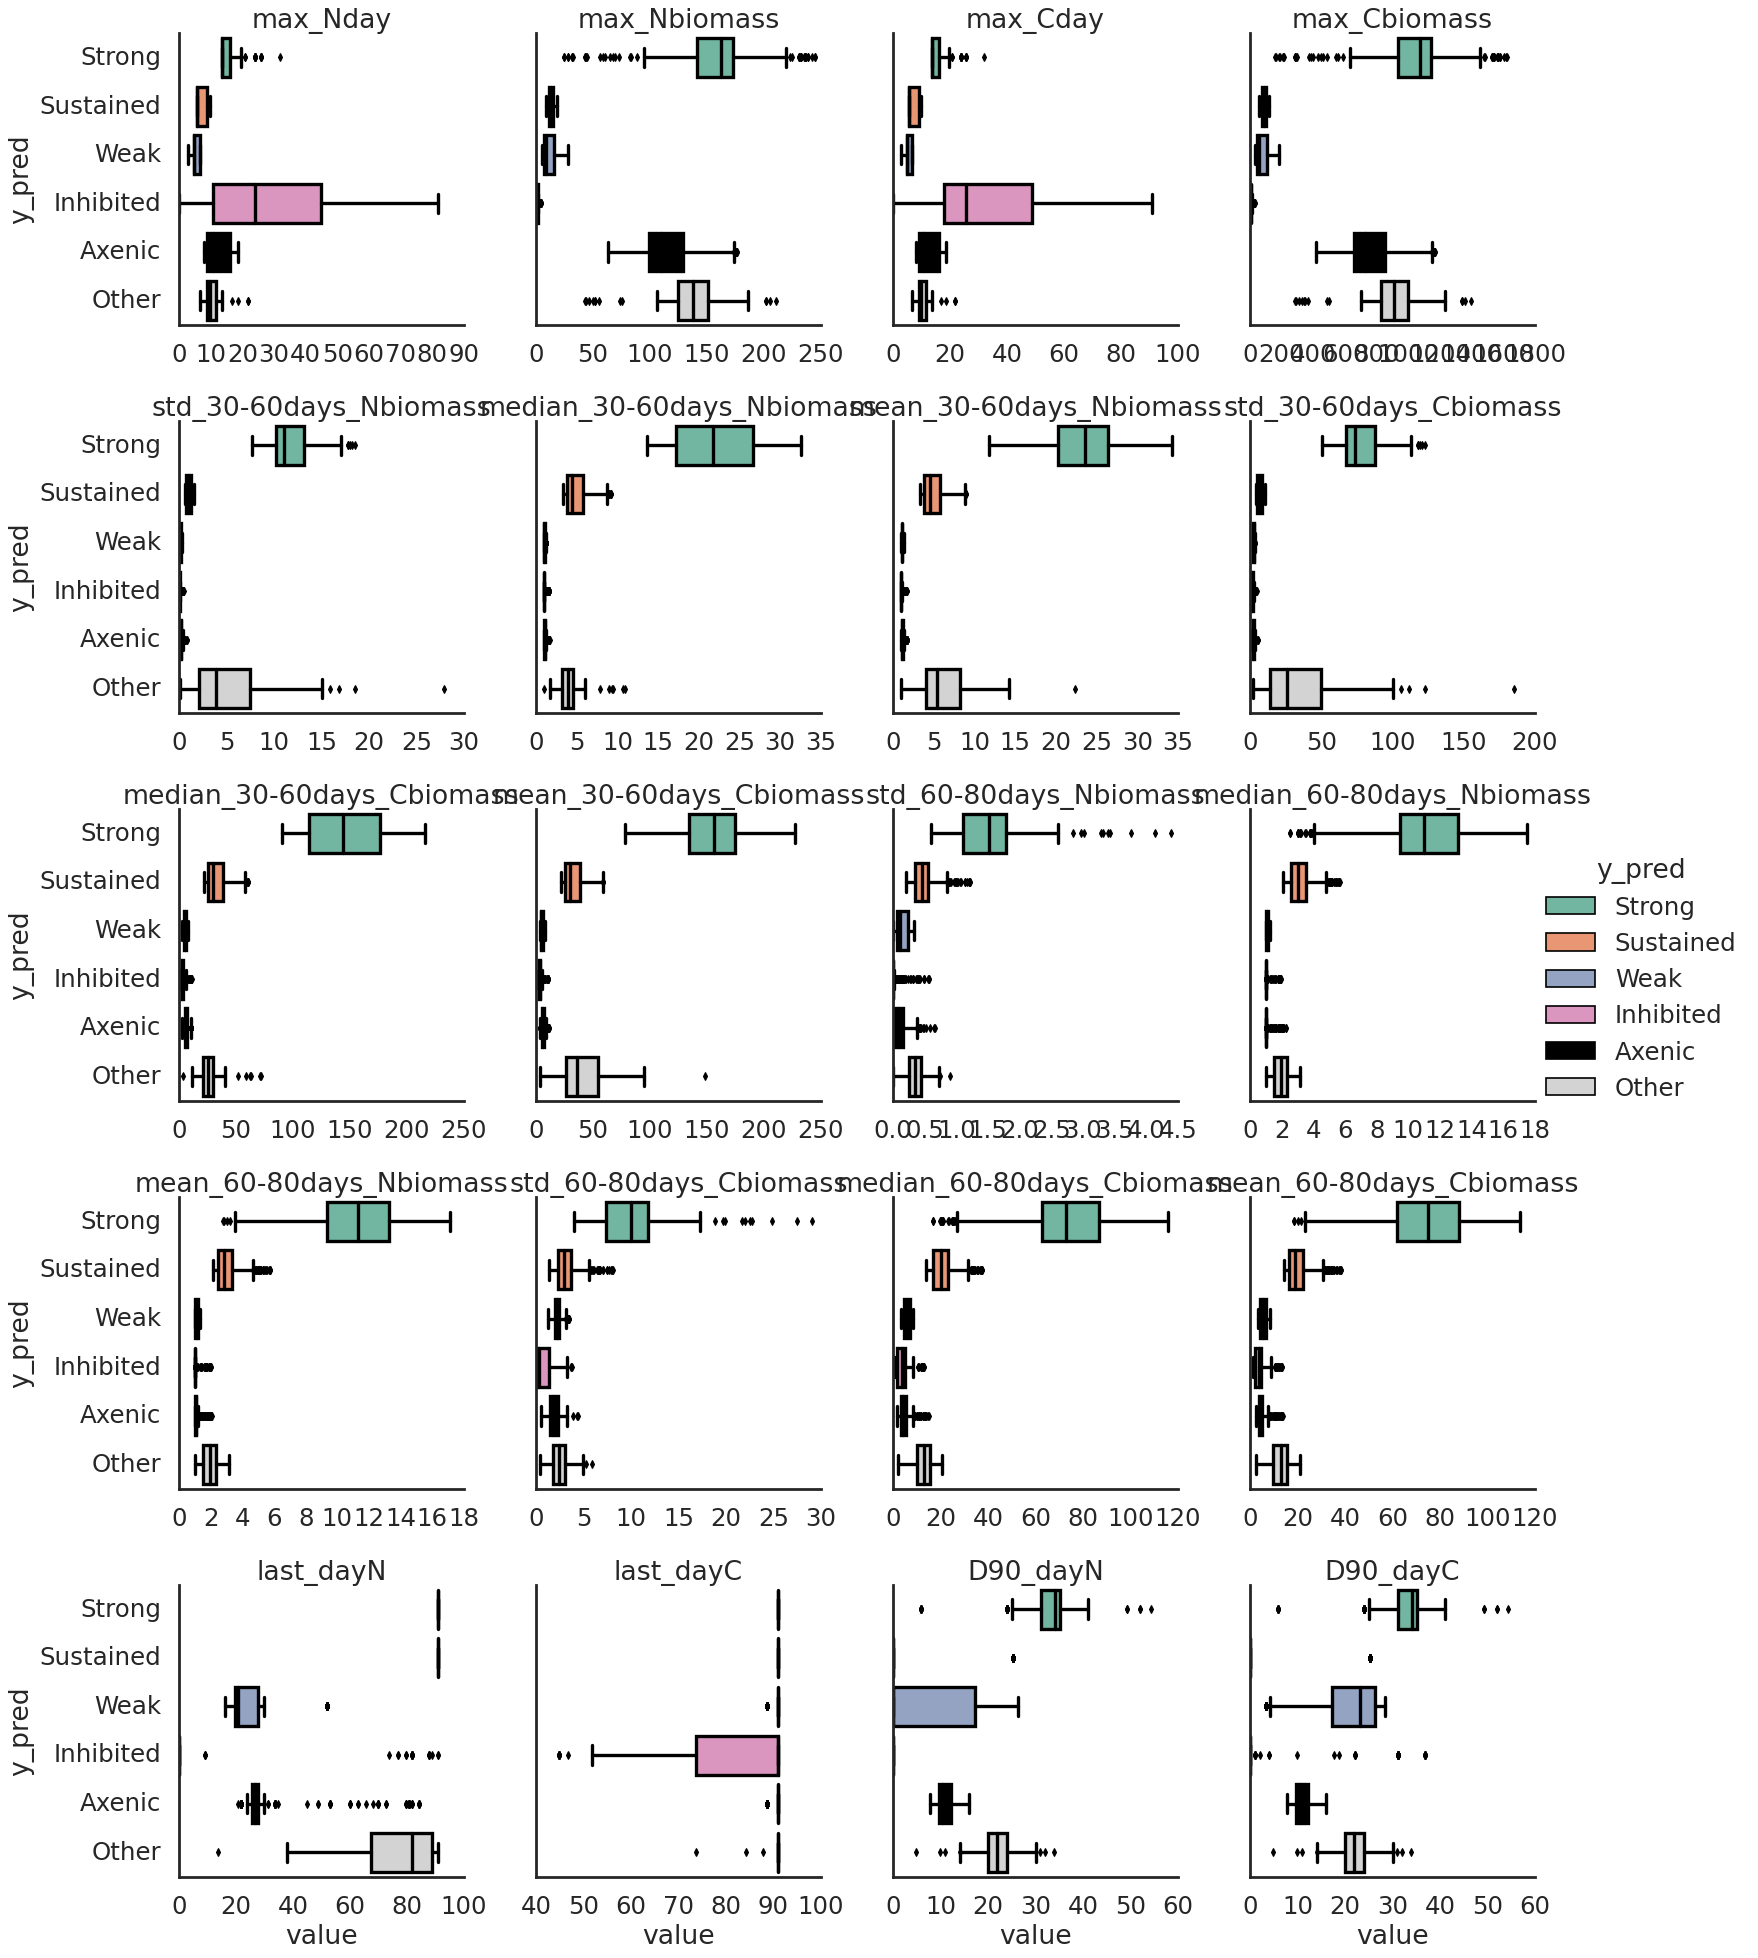

In [114]:
sns.set_context('poster')
sns.catplot(
    data=df_train_maxday,
    y='y_pred', x='value', order=gorder,
    col='variable', col_wrap=4,
    kind='box',
    hue='y_pred', hue_order=gorder, palette=gpalette,
    sharex=False, dodge=False,
).set_titles(col_template='{col_name}')


In [115]:
df_predicted

,train_Group,Sample,id,full name,Group,Experiment,Axenic,Inhibited,Other,Strong,Sustained,Weak,y,y_pred
0,Axenic,1A0,1,Axenic,Axenic,10CC,0.986878,0.002117,0.007022,0.000928,0.001259,0.001795,Axenic,Axenic
1,Axenic,1B0,1,Axenic,Axenic,10CC,0.986808,0.002128,0.007053,0.000933,0.001265,0.001813,Axenic,Axenic
2,Axenic,1C0,1,Axenic,Axenic,10CC,0.986839,0.002123,0.007040,0.000931,0.001262,0.001805,Axenic,Axenic
3,Axenic,5x5_30A0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.987069,0.002115,0.006876,0.000977,0.001201,0.001761,Axenic,Axenic
4,Axenic,5x5_30B0,MED4_Ax_Pro,Axenic,Axenic,5x5,0.987047,0.002118,0.006890,0.000978,0.001203,0.001764,Axenic,Axenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Weak,10B0,10,Marinovum 5F3,Weak,10CC,0.001615,0.002148,0.003868,0.000853,0.001259,0.990257,Weak,Weak
413,Weak,10C0,10,Marinovum 5F3,Weak,10CC,0.001654,0.002122,0.004015,0.000996,0.001303,0.989908,Weak,Weak
414,Weak,11A0,11,Roseovarius 5C3,Weak,10CC,0.001621,0.002134,0.003866,0.000852,0.001258,0.990269,Weak,Weak
415,Weak,11B0,11,Roseovarius 5C3,Weak,10CC,0.001612,0.002134,0.003858,0.000851,0.001256,0.990289,Weak,Weak


# Compute features for ref samples

In [116]:
ref_groupby_col = ['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',]
X_ref, forest_features1, logistic_Nfeatures1, logistic_Cfeatures1 = ml.df2finalX(
    refdf_final_df, groupby_cols=ref_groupby_col)

In [117]:
ref_groupby_col = ['train_Group', 'Sample', 'id', 'full name', 'Group', 'Experiment',]
X_intetpolate, forest_features1, logistic_Nfeatures1, logistic_Cfeatures1 = ml.df2finalX(
    refdf_interpolate, groupby_cols=ref_groupby_col)

In [118]:
fref_feature_df = X_ref[forest_features]
fint_feature_df = X_intetpolate[forest_features]


In [119]:
df_ref_maxday = fref_feature_df.reset_index().melt(id_vars=ref_groupby_col)
df_int_maxday = fint_feature_df.reset_index().melt(id_vars=ref_groupby_col)


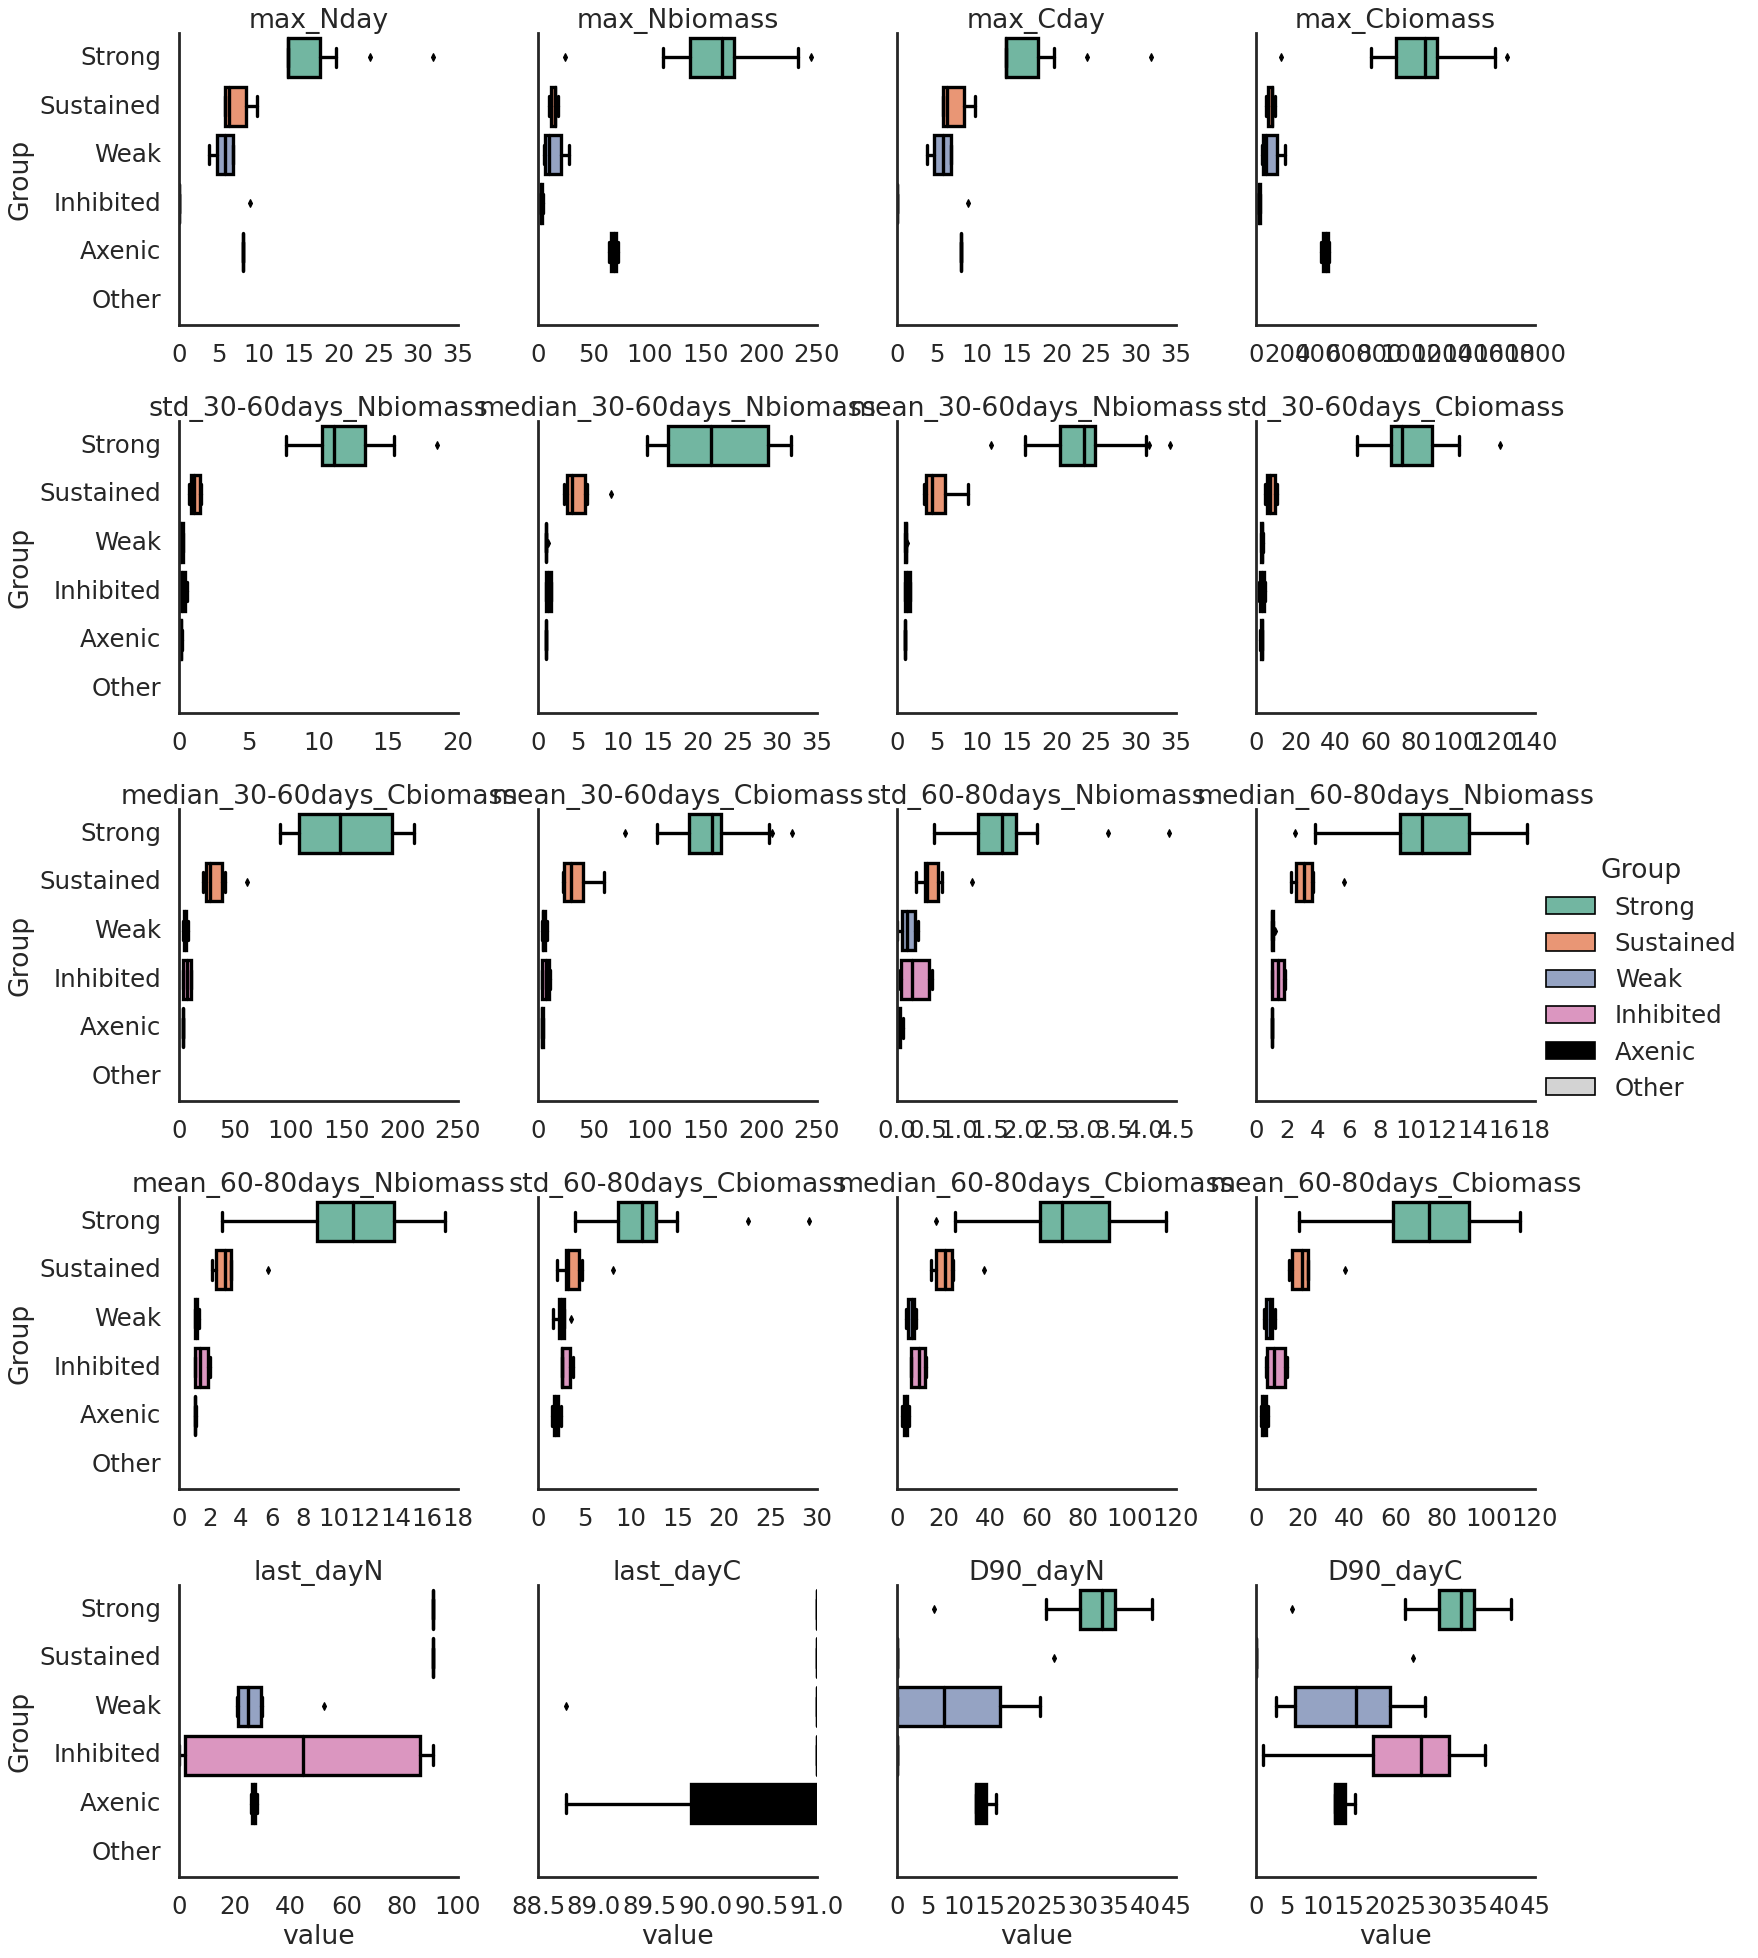

In [120]:
sns.set_context('poster')
sns.catplot(
    data=df_ref_maxday,
    y='Group', x='value', order=gorder,
    col='variable', col_wrap=4,
    kind='box',
    hue='Group', hue_order=gorder, palette=gpalette,
    sharex=False, dodge=False,
).set_titles(col_template='{col_name}')


In [121]:
df_ref_maxday['type'] = 'ref' 
df_ref_maxday['y_pred'] = df_ref_maxday['Group']
df_int_maxday['type'] = 'interpolate' 
df_int_maxday['y_pred'] = df_int_maxday['train_Group']
df_train_maxday['type'] = 'train' 
df_maxday = pd.concat([df_ref_maxday, df_int_maxday,df_train_maxday], ignore_index=True)

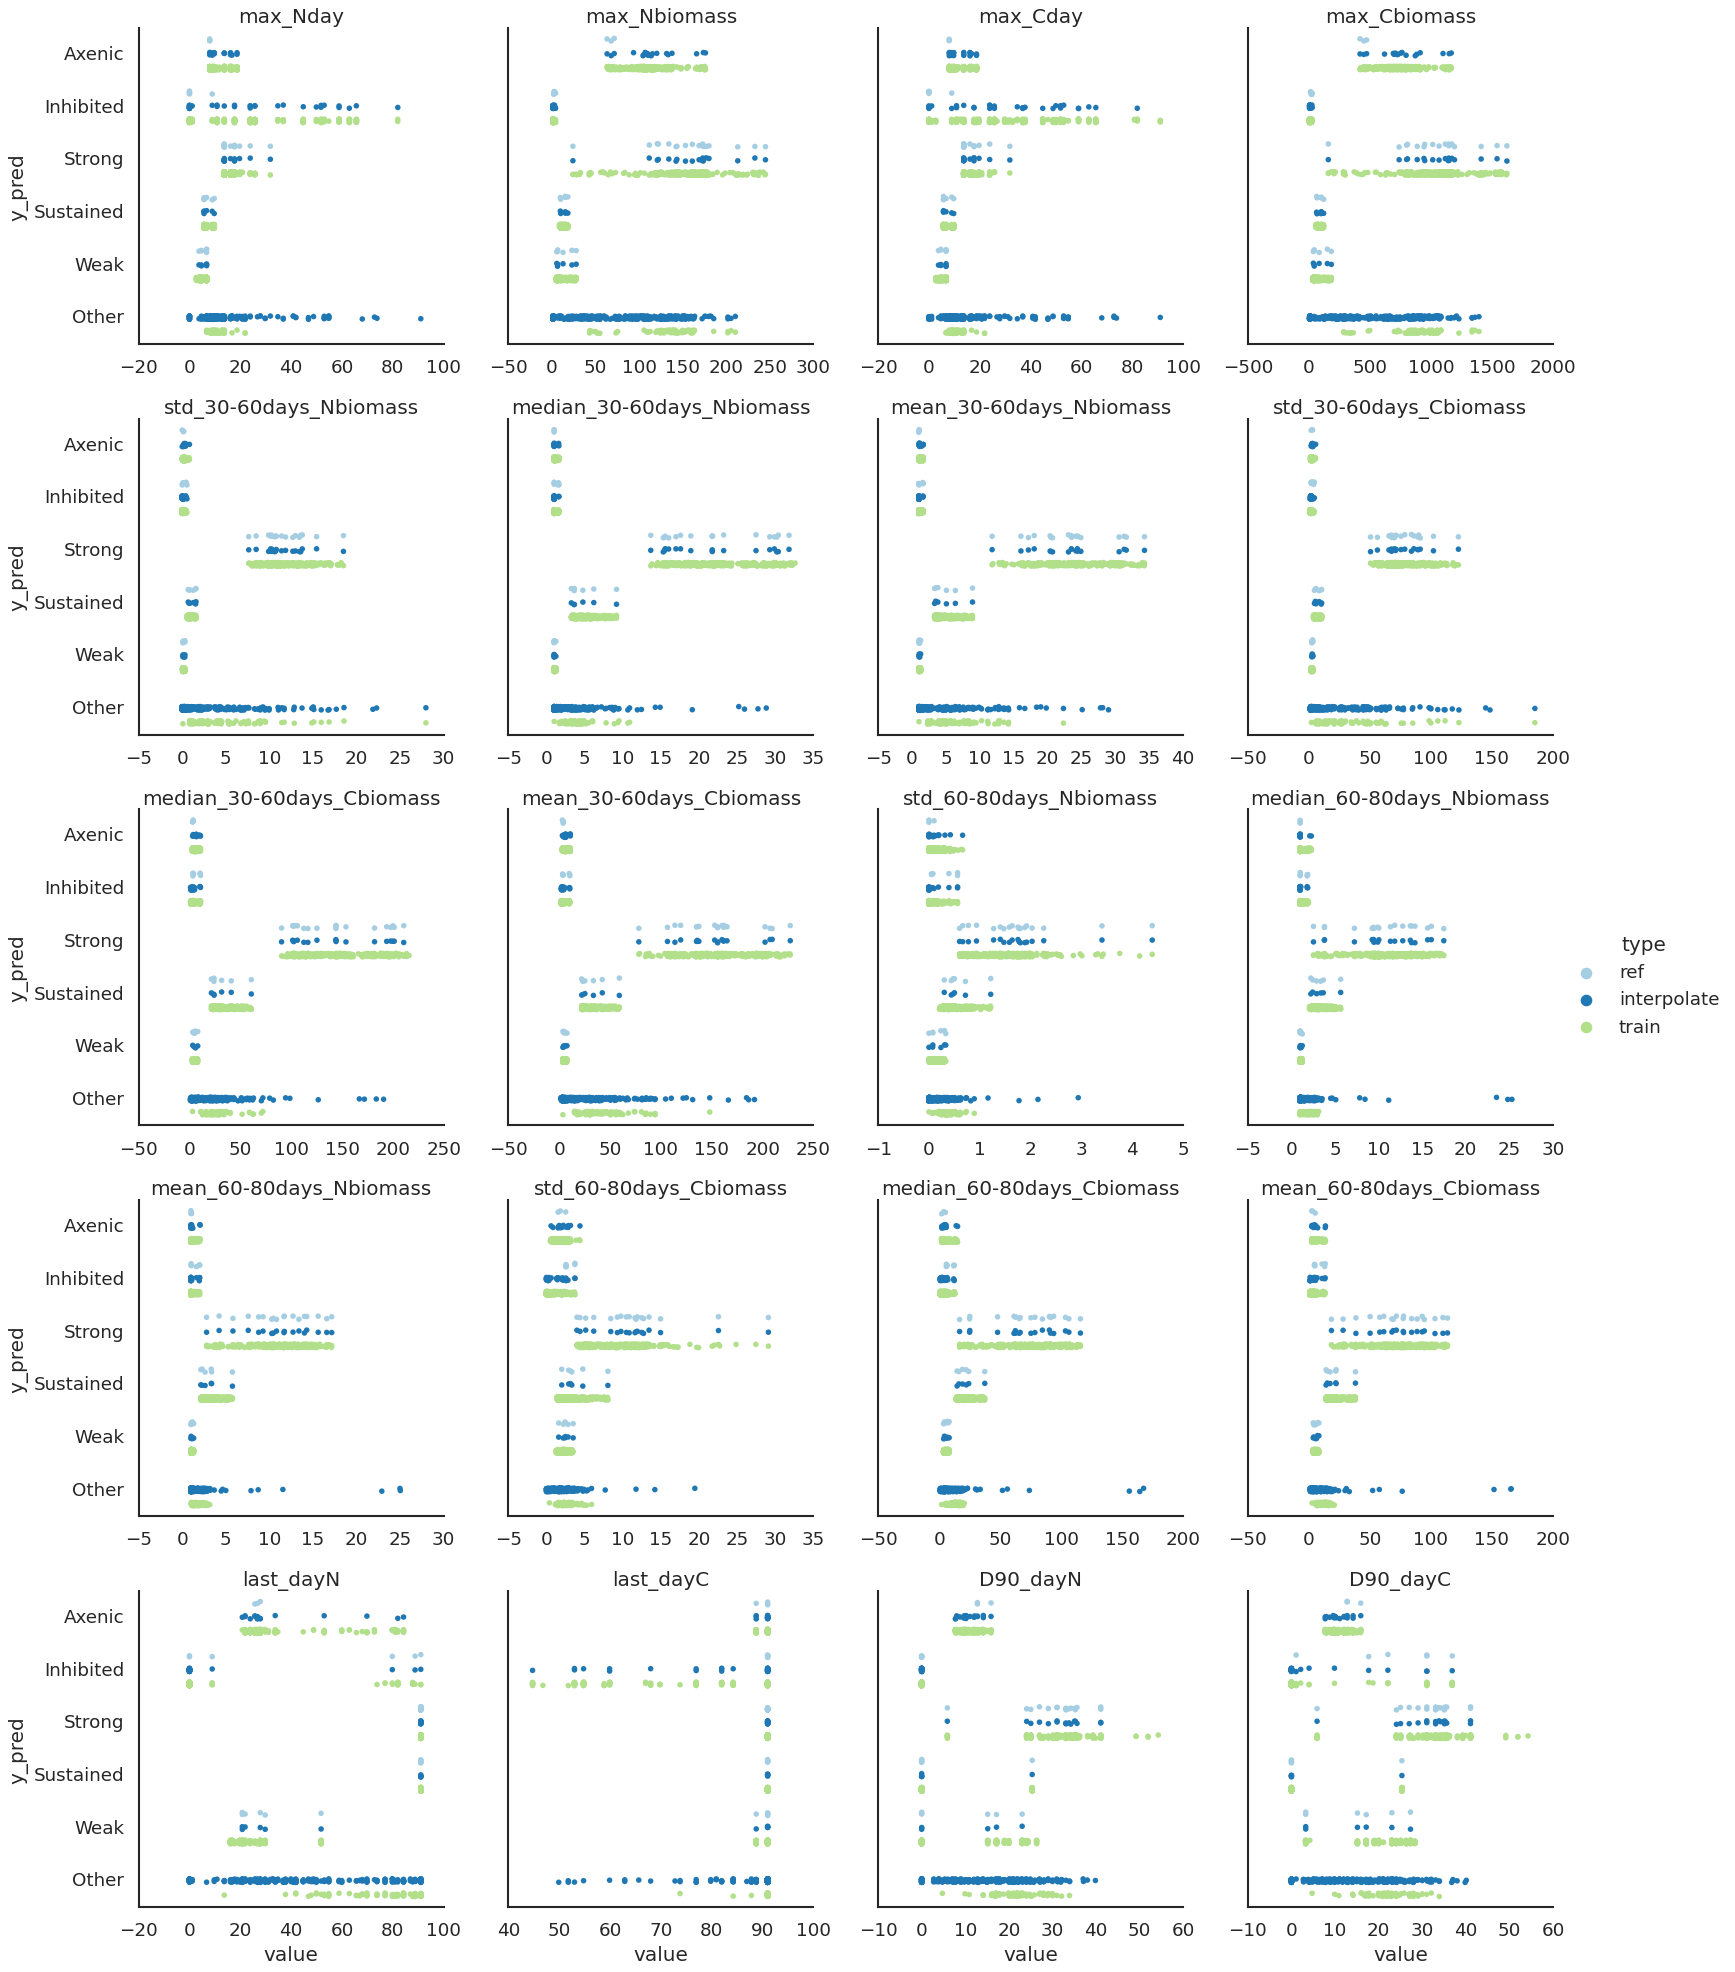

In [122]:
sns.set_context('talk')
sns.catplot(
    data=df_maxday,
    y='y_pred', x='value', #order=gorder,
    col='variable', col_wrap=4, #aspect=2,
    
    #kind='box',
    hue='type', hue_order=['ref', 'interpolate', 'train'], palette='Paired',
    sharex=False, dodge=True,
).set_titles(col_template='{col_name}')


In [123]:
df_maxday.loc[df_maxday.variable.isin(['max_Nbiomass']) & ~df_maxday.y_pred.isin(['Other'])].groupby(['y_pred', 'id'])['value'].max().head(50)

y_pred     id         
Axenic     1               71.453010
           MED4_Ax_Pro    176.144498
           MED4_lowN      137.723507
Inhibited  3                4.197601
           4                2.954736
Strong     5              142.405747
           MED4_1A3       244.976101
           MED4_ATCC      134.097949
           MED4_BS11      180.183815
           MED4_DE        176.886121
           MED4_DE1       168.815802
Sustained  6               18.291220
           7               15.664788
Weak       10              27.804218
           11              22.895292
Name: value, dtype: float64

In [124]:
df_maxday.to_csv('features_training.csv.gz', index=False)

In [125]:
from joblib import dump, load
dump(stack, '10CC_ML_classifier.joblib') 

['10CC_ML_classifier.joblib']

In [126]:
df_int_maxday.loc[df_int_maxday.y_pred.isin(['Axenic']) ].Sample.unique()

array(['1A0', '1B0', '1C0', '5x5_30A0', '5x5_30B0', '5x5_30C0',
       'Ax_Media_A4', 'Ax_Media_A5', 'Ax_Media_A6', 'Ax_Media_B4',
       'Ax_Media_B5', 'Ax_Media_B6', 'Ax_Media_C4', 'Ax_Media_C5',
       'Ax_Media_C6', 'Ax_Media_D4', 'Ax_Media_D5', 'Ax_Media_D6'],
      dtype=object)

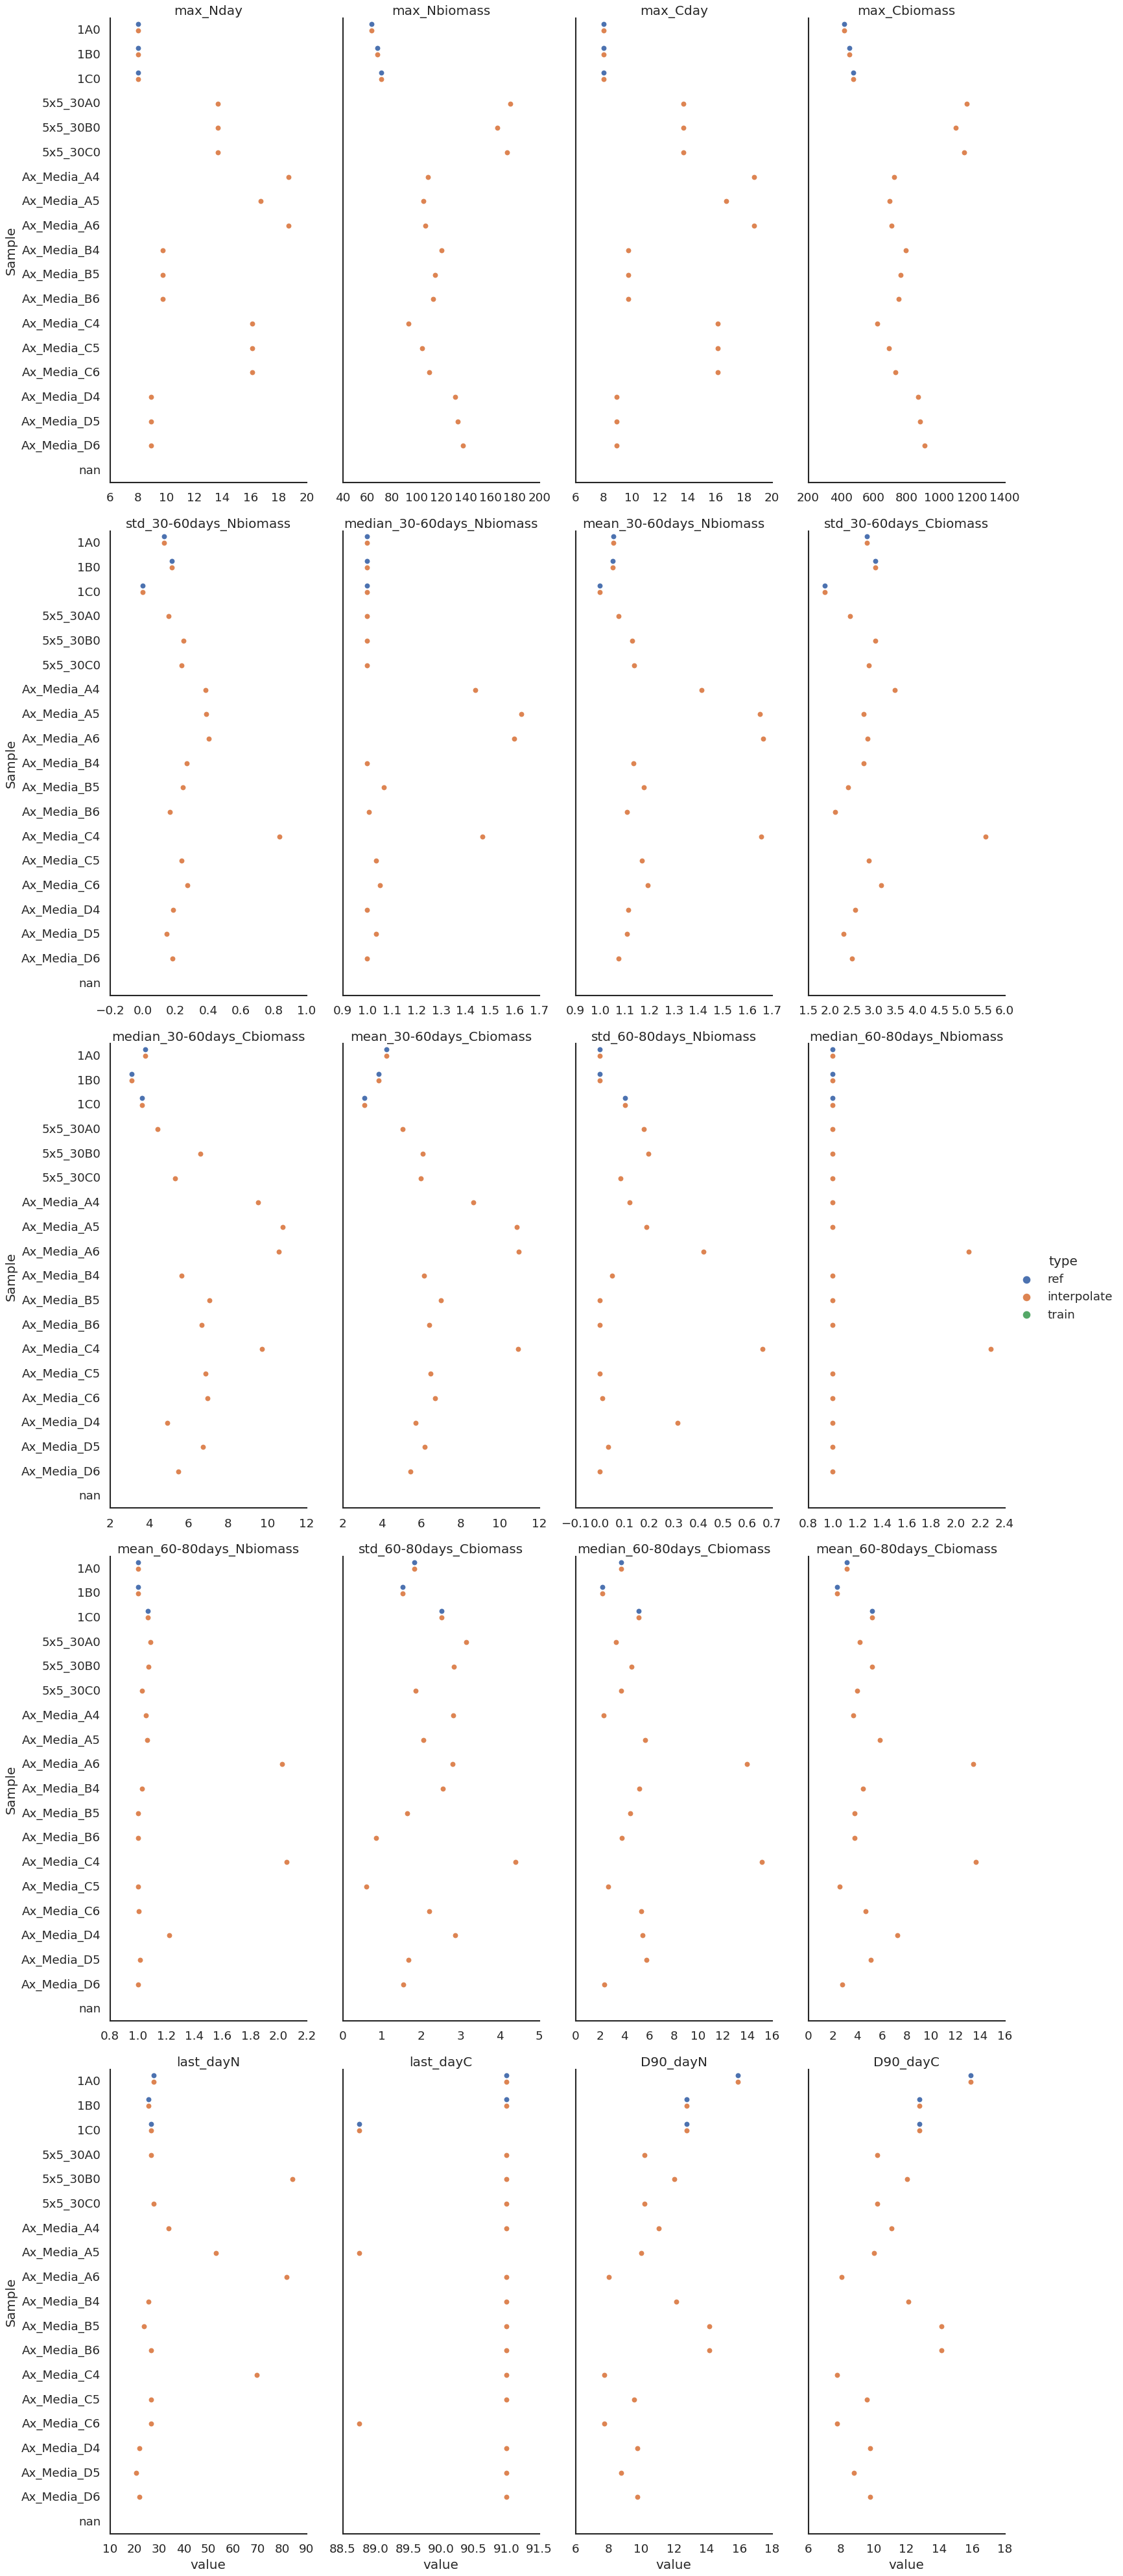

In [127]:
sns.set_context('talk')
sns.catplot(
    data=df_maxday.loc[df_maxday.y_pred.isin(['Axenic']) ],
    y='Sample', x='value', #order=gorder,
    col='variable', col_wrap=4, #aspect=2,
    s=50,
    #kind='box',
    hue='type', #hue_order=['ref', 'train'], palette='Paired',
    sharex=False, dodge=True, height=10, aspect=0.5,
).set_titles(col_template='{col_name}')
